In [1]:
#Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = 'whitegrid')

In [2]:
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

## PRUEBAS 

PRUEBAS ANGELA

# LOAD FILES

In [3]:
dfResLab = pd.read_csv("data/RESULTADOS_LAB.csv", on_bad_lines='skip', delimiter =";",low_memory=False)
dfNotObl = pd.read_csv("data/EVENTOS_NOTIFICACION_OBLIGATORIA.csv",on_bad_lines='skip', delimiter =";",low_memory=False)
dfRuaf = pd.read_csv("data/RUAF_ND.csv",on_bad_lines='skip', delimiter =";",low_memory=False)
#df4 = pd.read_csv("Data/COSTOS_DE_ MEDICAMENTOS_ E_ INSUMOS.csv", on_bad_lines='skip', delimiter =";",low_memory=False)

In [4]:
#dimensions of the dataset Resultados laboratorio
nrowlab, ncollab = dfResLab.shape 
nrowlab, ncollab

(546443, 17)

In [5]:
#dimensions of the dataset Notificaciones
nrowNot, ncolNot = dfNotObl.shape
nrowNot, ncolNot

(32430, 72)

In [6]:
#dimensions of the dataset RUAF
nrowRuaf, ncolRuaf = dfRuaf.shape
nrowRuaf, ncolRuaf

(9553, 82)

In [7]:
# Drop duplicates rows - if any
dfResLab = dfResLab.drop_duplicates()
dfNotObl = dfNotObl.drop_duplicates()
dfRuaf = dfRuaf.drop_duplicates()

The dimensions of the DataFrame calculated above indicate the number of record and the number of variables in each dataset

In [8]:
# Column identification standardization to facilitate joining
dfNotObl.rename(columns = {'IDENTIFICACIÓN':'IDENTIFICACION'}, inplace = True)

#EDA LAB RESULTS

In [9]:
#dimensions of the dataset Resultados laboratorio
nrowlab, ncollab = dfResLab.shape 
nrowlab, ncollab

(546443, 17)

In [10]:
dfResLab.head(3)

,FECHA DE TOMA DE MUESTRA,IDENTIFICACION,CODIGO DE LA MUESTRA,FECHA DE NACIMIENTO,GENERO,TIPO DE MUESTRA,SALA,MICROORGANISMO,ANTIBIOTICO,SENSIBLE / RESISTENTE / INTERMEDIO,LA CONCENTRACION MINIMA O MAX,HOSPILTAL,NUMERO DE AISLAMIENTO,ESBL (+ es blee ),THM,APB (boronico),EDTA (si son positivas o negativas)
0,10/12/2013 11:48:00,2232117,13-11366-S,SIN DATO,SIN ESPECIFICAR,HEMOCULTIVO PUNCION PERIFERICA,RECIEN NACIDOS (CIRENA),Escherichia coli,Amikacina,S,<=8,HOSPITAL UNIVERSITARIO DEL VALLE,1,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR
1,10/12/2013 11:48:00,2232117,13-11366-S,SIN DATO,SIN ESPECIFICAR,HEMOCULTIVO PUNCION PERIFERICA,RECIEN NACIDOS (CIRENA),Escherichia coli,Amoxicilina-Clavulanato,S,8/4,HOSPITAL UNIVERSITARIO DEL VALLE,1,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR
2,10/12/2013 11:48:00,2232117,13-11366-S,SIN DATO,SIN ESPECIFICAR,HEMOCULTIVO PUNCION PERIFERICA,RECIEN NACIDOS (CIRENA),Escherichia coli,Ampicilina,R,>16,HOSPITAL UNIVERSITARIO DEL VALLE,1,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR


In [11]:
dfResLab['FECHA DE TOMA DE MUESTRA'] = dfResLab['FECHA DE TOMA DE MUESTRA'].astype(str).str[0:10]
dfResLab['FECHA DE TOMA DE MUESTRA'] = pd.to_datetime(dfResLab['FECHA DE TOMA DE MUESTRA'], dayfirst=True)

In [12]:
# dfResLab Info
dfResLab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546443 entries, 0 to 546442
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   FECHA DE TOMA DE MUESTRA             546443 non-null  datetime64[ns]
 1   IDENTIFICACION                       546443 non-null  object        
 2   CODIGO DE LA MUESTRA                 546443 non-null  object        
 3   FECHA DE NACIMIENTO                  546443 non-null  object        
 4   GENERO                               546443 non-null  object        
 5   TIPO DE MUESTRA                      546443 non-null  object        
 6   SALA                                 546443 non-null  object        
 7   MICROORGANISMO                       546443 non-null  object        
 8   ANTIBIOTICO                          546443 non-null  object        
 9   SENSIBLE / RESISTENTE / INTERMEDIO   546443 non-null  object        
 

This dataset has 546443 records(rows) and 13 variables (columns). The dataset is comprised mainly of categorical values

## HOSPILTAL VARIABLE

In [13]:
# HOSPILTAL list
dfResLab['HOSPILTAL'].unique()

array(['HOSPITAL UNIVERSITARIO DEL VALLE', 'SIN ESPECIFICAR',
       'DEPARTAMENTO DEL VAL', 'EMSSANAR E.S.S', 'CAPRECOM NACIONAL',
       'ASMET SALUD', nan, 'ASOC. M. BARRIOS U.', 'COOSALUD EPS-S',
       'SALUDVIDA EPS', 'EPS COMFAMILIAR DE N', 'SECRETARIA DE SALUD',
       'SEC DPTAL SALUD DEL', 'QBE SEGUROS S.A', 'CONSORCIO SAYP 2011',
       'SECRET. DE SALUD DPT', 'CAPRECOM', 'S.O.S. SERV.OCCID.DE',
       'ASOCIACION INDIGENA', 'COOSALUD E.S.S', 'SALUD COLMENA EPS',
       'NUEVA EPS', 'E.P.S. INDIGENA MALL', 'SECRET.SALUD DPTAL P',
       'SEGUROS DEL ESTADO', 'SALUDVIDA', 'A.R.S.-COMFAMILIAR H',
       'CAFESALUD EPS', 'CAFESALUD SISBEN', 'COMFAMILIAR NARINO',
       'CAJA COMPENSACION FA', 'CAPITAL SALUD EPS-S', 'CAJACOPI',
       'P.N . DIRECCION DE S', 'SALUDCOOP', 'COSMITET LTDA',
       'COMFENALCO VALLE', 'CAJA COMP FLIAR CHOC', 'COOP.DE SALUD SEVILL',
       'CAJA COMPENSACION FL', 'CAJA PREV. SOCIAL DE',
       'SECRET.SALUD DPTAL D', 'SALUD TOTAL EPS', 'E.P.S. CONVID

In [14]:
# number of categories for HOSPILTAL
len(dfResLab['HOSPILTAL'].unique())

83

In [15]:
# Number of Missing Values
dfResLab['HOSPILTAL'].isnull().sum()

24820

## IDENTIFICATION VARIABLE

In [16]:
# Identification list
dfResLab['IDENTIFICACION'].unique()

array(['2232117', '2225907', '2225407', ..., '30744000', '24999535',
       '1239688398'], dtype=object)

In [17]:
# number of categories for Identification
len(dfResLab['IDENTIFICACION'].unique())

16095

In [18]:
 dfResLab.IDENTIFICACION.value_counts() 

1114875048    562
14468615      518
66938118      477
1109567757    459
1130609288    447
             ... 
38865407        1
31907283        1
1144069466      1
165435371       1
0001016098      1
Name: IDENTIFICACION, Length: 16095, dtype: int64

In [19]:
# Number of Missing Values
dfResLab['IDENTIFICACION'].isnull().sum()

0

The main key of the DataFrame dfResLab (Lab Results) in patient ID. The exploration above indicates that each patient may have several test results and each test has 21 associated records, one per antibiotic tested. The dataset contains 546443 belonging to 16095 unique patients.

## MICROORGANISM VARIABLE

In [20]:
# Microorganismo List
dfResLab['MICROORGANISMO'].unique()

array(['Escherichia coli', 'Staphylococcus epidermidis',
       'Pseudomonas aeruginosa', 'Klebsiella oxytoca',
       'Pseudomonas putida', 'Staphylococcus aureus',
       'Enterococcus faecalis', 'Pseudomonas fluorescens',
       'Enterobacter cloacae',
       'Acinetobacter baumannii/calcoaceticus complejo',
       'Acinetobacter baumannii', 'Candida albicans',
       'Citrobacter freundii', 'Klebsiella pneumoniae',
       'Citrobacter koseri', 'Stenotrophomonas maltophilia',
       'Staphylococcus hominis', 'Staphylococcus coagulasa-negativo',
       'Citrobacter youngae', 'Staphylococcus haemolyticus',
       'Proteus mirabilis', 'Morganella morganii', 'Aeromonas hydrophila',
       'Cronobacter sakazakii complejo', 'Candida tropicalis',
       'Enterococcus faecium', 'Acinetobacter lwoffii/haemolyticus',
       'Staphylococcus saprophyticus', 'Elizabethkingia meningoseptica',
       'Aeromonas caviae', 'Acinetobacter spp.',
       'Cryptococcus neoformans', 'Serratia marcescens',

In [21]:
# number of microorganism
len(dfResLab['MICROORGANISMO'].unique())

314

In [22]:
# Number of Missing Values
dfResLab['MICROORGANISMO'].isnull().sum()

0

314 unique microorganismos were identified in the 546443 laboratory result records. Groupings of these microorganisms by species may facilitate further exploration.

In [23]:
#Dictionary to group Microorganisms by species
microorganism_dict={
    "Vibrio fluvialis":"Vibrionaceae",
    "Vibrio cholerae":"Vibrionaceae",
    "Trueperella pyogenes":"Actinomycetaceae",
    "Trichosporon spp.":"Levaduras",
    "Trichosporon mucoides":"Levaduras",
    "Trichosporon inkin":"Levaduras",
    "Trichosporon asahii":"Levaduras",
    "Trichosporon":"Levaduras",
    "Trichophyton tonsurans":"Dermatofitos",
    "Trichophyton rubrum":"Dermatofitos",
    "Trichophyton mentagrophytes var mentagrophytes":"Dermatofitos",
    "Trichophyton mentagrophytes":"Dermatofitos",
    "Tatumella ptyseos":"Enterobacteriales",
    "Streptococcus viridans grupo":"Streptococcaceae",
    "Streptococcus vestibularis":"Streptococcaceae",
    "Streptococcus uberis":"Streptococcaceae",
    "Streptococcus spp.":"Streptococcaceae",
    "Streptococcus sobrinus":"Streptococcaceae",
    "Streptococcus sanguinis":"Streptococcaceae",
    "Streptococcus salivarius":"Streptococcaceae",
    "Streptococcus pyogenes (Strep. grupo A)":"Streptococcaceae",
    "Streptococcus porcinus":"Streptococcaceae",
    "Streptococcus pneumoniae":"Streptococcaceae",
    "Streptococcus parasanguinis":"Streptococcaceae",
    "Streptococcus oralis":"Streptococcaceae",
    "Streptococcus mutans":"Streptococcaceae",
    "Streptococcus mitis/pneumoniae":"Streptococcaceae",
    "Streptococcus mitis grupo":"Streptococcaceae",
    "Streptococcus mitis":"Streptococcaceae",
    "Streptococcus intermedius":"Streptococcaceae",
    "Streptococcus grupo C/G (colonia pequeña)":"Streptococcaceae",
    "Streptococcus grupo C/G (colonia grande)":"Streptococcaceae",
    "Streptococcus gordonii":"Streptococcaceae",
    "Streptococcus gallolyticus/infantarius":"Streptococcaceae",
    "Streptococcus gallolyticus ssp pasteurianus/infantarius":"Streptococcaceae",
    "Streptococcus gallolyticus ssp pasteurianus":"Streptococcaceae",
    "Streptococcus gallolyticus ssp gallolyticus":"Streptococcaceae",
    "Streptococcus gallolyticus":"Streptococcaceae",
    "Streptococcus equisspzooepidemicus":"Streptococcaceae",
    "Streptococcus equisspequi":"Streptococcaceae",
    "Streptococcus equinus":"Streptococcaceae",
    "Streptococcus equi ssp zooepidemicus":"Streptococcaceae",
    "Streptococcus equi ssp equi":"Streptococcaceae",
    "Streptococcus dysgalactiae/canis":"Streptococcaceae",
    "Streptococcus dysgalactiae ssp equisimilis":"Streptococcaceae",
    "Streptococcus dysgalactiae":"Streptococcaceae",
    "Streptococcus constellatus":"Streptococcaceae",
    "Streptococcus beta-hemolítico ACG (colonia grande)":"Streptococcaceae",
    "Streptococcus anginosus (antesmilleri) grupo":"Streptococcaceae",
    "Streptococcus anginosus (antes milleri) grupo":"Streptococcaceae",
    "Streptococcus anginosus":"Streptococcaceae",
    "Streptococcus alfa-hemolítico":"Streptococcaceae",
    "Streptococcus agalactiae (Strep. grupo B)":"Streptococcaceae",
    "Streptococcus acidominimus":"Streptococcaceae",
    "Streptococcus":"Streptococcaceae",
    "Stenotrophomonas spp.":"Xanthomonadaceae",
    "Stenotrophomonas maltophilia":"Xanthomonadaceae",
    "Stenotrophomonas":"Xanthomonadaceae",
    "Staphylococcus xylosus":"Staphylococcaceae",
    "Staphylococcus warneri":"Staphylococcaceae",
    "Staphylococcus spp.":"Staphylococcaceae",
    "Staphylococcus simulans":"Staphylococcaceae",
    "Staphylococcus sciuri":"Staphylococcaceae",
    "Staphylococcus schleiferi ssp coagulans":"Staphylococcaceae",
    "Staphylococcus schleiferi":"Staphylococcaceae",
    "Staphylococcus saprophyticus":"Staphylococcaceae",
    "Staphylococcus saccharolyticus":"Staphylococcaceae",
    "Staphylococcus pettenkoferi":"Staphylococcaceae",
    "Staphylococcus pasteuri":"Staphylococcaceae",
    "Staphylococcus lugdunensis":"Staphylococcaceae",
    "Staphylococcus lentus":"Staphylococcaceae",
    "Staphylococcus kloosii":"Staphylococcaceae",
    "Staphylococcus intermedius":"Staphylococcaceae",
    "Staphylococcus hominis":"Staphylococcaceae",
    "Staphylococcus haemolyticus/lugdunensis":"Staphylococcaceae",
    "Staphylococcus haemolyticus":"Staphylococcaceae",
    "Staphylococcus gallinarum":"Staphylococcaceae",
    "Staphylococcus felis":"Staphylococcaceae",
    "Staphylococcus equorum":"Staphylococcaceae",
    "Staphylococcus epidermidis":"Staphylococcaceae",
    "Staphylococcus cohniisspurealyticum":"Staphylococcaceae",
    "Staphylococcus cohnii ssp urealyticum":"Staphylococcaceae",
    "Staphylococcus cohnii ssp cohnii":"Staphylococcaceae",
    "Staphylococcus coagulasa-positivo":"Staphylococcaceae",
    "Staphylococcus coagulasa-negativo":"Staphylococcaceae",
    "Staphylococcus chromogenes":"Staphylococcaceae",
    "Staphylococcus carnosus":"Staphylococcaceae",
    "Staphylococcus caprae":"Staphylococcaceae",
    "Staphylococcus capitis ssp urealyticus":"Staphylococcaceae",
    "Staphylococcus capitis ssp capitis":"Staphylococcaceae",
    "Staphylococcus capitis":"Staphylococcaceae",
    "Staphylococcus auricularis":"Staphylococcaceae",
    "Staphylococcus aureus":"Staphylococcaceae",
    "Staphylococcus":"Staphylococcaceae",
    "Sphingomonas paucimobilis":"Sphingomonadaceae",
    "Sphingobacterium spiritivorum":"Sphingobacteriaceae",
    "Shigella sonnei":"Enterobacteriales",
    "Shigella flexneri":"Enterobacteriales",
    "Shigella dysenteriae":"Enterobacteriales",
    "Shigella boydii":"Enterobacteriales",
    "Shigella":"Enterobacteriales",
    "Shewanella putrefaciens":"Shewanellaceae",
    "Serratia plymuthica":"Enterobacteriales",
    "Serratia marcescens ssp marcescens":"Enterobacteriales",
    "Serratia marcescens":"Enterobacteriales",
    "Serratia liquefaciens":"Enterobacteriales",
    "Scedosporium apiospermum":"Mohos",
    "Salmonella spp.":"Enterobacteriales",
    "Salmonella enterica ssp enterica sv Typhi":"Enterobacteriales",
    "Salmonella enterica ssp enterica sv Paratyphi A":"Enterobacteriales",
    "Salmonella enterica ssp enterica serovar Choleraesuis":"Enterobacteriales",
    "Salmonella enterica ssp arizonae":"Enterobacteriales",
    "Salmonella enterica ss penterica sv Typhi":"Enterobacteriales",
    "Salmonella enterica ss penterica sv Paratyphi A":"Enterobacteriales",
    "Salmonella":"Enterobacteriales","Saccharomyces cerevisiae":"Levaduras",
    "Rothia spp.":"Micrococcales","Rothia mucilaginosa":"Micrococcales",
    "Rothia dentocariosa":"Micrococcales","Rothia":"Micrococcales",
    "Rhodotorula spp.":"Levaduras",
    "Rhodotorula mucilaginosa var mucilaginosa":"Levaduras",
    "Rhodotorula glutinis":"Levaduras","Rhodotorula":"Levaduras",
    "Rhodococcus":"Nocardiaceae",
    "Rhizopus":"Mucorales",
    "Rhizobium radiobacter":"Rhizobiaceae",
    "Ralstonia pickettii":"Burkholderiales",
    "Pseudomonas stutzeri":"Pseudomonadaceae",
    "Pseudomonas spp.":"Pseudomonadaceae",
    "Pseudomonas putida":"Pseudomonadaceae",
    "Pseudomonas pseudoalcaligenes":"Pseudomonadaceae",
    "Pseudomonas oryzihabitans":"Pseudomonadaceae",
    "Pseudomonas luteola":"Pseudomonadaceae",
    "Pseudomonas fluorescens":"Pseudomonadaceae",
    "Pseudomonas aeruginosa":"Pseudomonadaceae",
    "Pseudomonas":"Pseudomonadaceae",
    "Providencia stuartii":"Enterobacteriales",
    "Providencia rustigianii":"Enterobacteriales",
    "Providencia rettgeri":"Enterobacteriales",
    "Providencia alcalifaciens":"Enterobacteriales",
    "Proteus vulgaris/penneri":"Enterobacteriales",
    "Proteus vulgaris":"Enterobacteriales",
    "Proteus penneri":"Enterobacteriales",
    "Proteus mirabilis":"Enterobacteriales",
    "Proteus":"Enterobacteriales",
    "Proteus spp.":"Enterobacteriales",
    "Pluralibacter gergoviae":"Enterobacteriales",
    "Penicillium spp.":"Mohos","Penicillium":"Mohos",
    "Pediococcus pentosaceus":"Lactobacillales",
    "Pediococcus acidilactici":"Lactobacillales",
    "Pasteurella multocida":"Pasteurellaceae",
    "Pasteurella aerogenes":"Pasteurellaceae",
    "Paracoccus yeei":"Rhodobacteraceae",
    "Pantoea agglomerans":"Enterobacteriales",
    "Ochrobactrum anthropi":"Brucellaceae",
    "Neoscytalidium dimidiatum":"Mohos",
    "Neisseria spp.":"Neisseriales",
    "Neisseria meningitidis":"Neisseriales",
    "Neisseria gonorrhoeae":"Neisseriales",
    "Neisseria animaloris":"Neisseriales",
    "Neisseria":"Neisseriales",
    "Morganella morganii":"Enterobacteriales",
    "Moraxella spp.":"Moraxellaceae",
    "Moraxella (Branhamella) catarrhalis":"Moraxellaceae",
    "Moraxella":"Moraxellaceae",
    "Moellerella wisconsensis":"Enterobacteriales",
    "Micrococcus spp.":"Micrococcales",
    "Micrococcus luteus":"Micrococcales",
    "Micrococcus":"Micrococcales",
    "Mannheimia haemolytica":"Pasteurellaceae",
    "Listeria monocytogenes/innocua":"Bacillales",
    "Listeria monocytogenes":"Bacillales",
    "Levaduras":"Levaduras",
    "Leuconostoc spp.":"Lactobacillales",
    "Leuconostoc lactis":"Lactobacillales",
    "Leuconostoc":"Lactobacillales",
    "Leifsonia aquatica":"Micrococcales",
    "Leclercia adecarboxylata":"Enterobacteriales",
    "Lactococcus spp.":"Streptococcaceae",
    "Lactococcus raffinolactis":"Streptococcaceae",
    "Lactococcus garvieae":"Streptococcaceae",
    "Lactococcus":"Streptococcaceae",
    "Lactobacillus spp.":"Lactobacillales",
    "Lactobacillus":"Lactobacillales",
    "Kytococcus sedentarius":"Micrococcales",
    "Kocuria varians":"Micrococcales",
    "Kluyvera intermedia":"Enterobacteriales",
    "Kluyvera ascorbata":"Enterobacteriales",
    "Klebsiella rhinoscleromatis":"Enterobacteriales",
    "Klebsiella pneumoniae":"Enterobacteriales",
    "Klebsiella ozaenae":"Enterobacteriales",
    "Klebsiella oxytoca":"Enterobacteriales",
    "Klebsiella aerogenes":"Enterobacteriales",
    "Kingella kingae":"Neisseriales",
    "Kingella denitrificans":"Neisseriales",
    "Hyphopichia burtonii":"Levaduras",
    "Histoplasma capsulatum":"Histoplasma",
    "Hafnia alvei":"Enterobacteriales",
    "Haemophilus spp.":"Pasteurellaceae",
    "Haemophilus influenzae":"Pasteurellaceae",
    "Haemophilus":"Pasteurellaceae",
    "Globicatella sanguinis":"Lactobacillales",
    "Geotrichum":"Levaduras",
    "Gemella spp.":"Bacillales",
    "Gemella morbillorum":"Bacillales",
    "Gemella haemolysans":"Bacillales",
    "Gemella":"Bacillales",
    "Fusarium spp.":"Mohos",
    "Fusarium":"Mohos",
    "Exophiala dermatitidis":"Levaduras",
    "Escherichia hermannii":"Enterobacteriales",
    "Escherichia fergusonii":"Enterobacteriales",
    "Escherichia coli":"Enterobacteriales",
    "Enterococcus spp.":"Enterococcaceae",
    "Enterococcus raffinosus":"Enterococcaceae",
    "Enterococcus hirae":"Enterococcaceae",
    "Enterococcus faecium":"Enterococcaceae",
    "Enterococcus faecalis":"Enterococcaceae",
    "Enterococcus durans":"Enterococcaceae",
    "Enterococcus casseliflavus/gallinarum":"Enterococcaceae",
    "Enterococcus casseliflavus":"Enterococcaceae",
    "Enterococcus avium":"Enterococcaceae",
    "Enterococcus":"Enterococcaceae",
    "Enterobacter hormaechei":"Enterobacteriales",
    "Enterobacter cloacae":"Enterobacteriales",
    "Enterobacter cancerogenus":"Enterobacteriales",
    "Enterobacter asburiae":"Enterobacteriales",
    "Empedobacter brevis":"Flavobacteriales",
    "Elizabethkingia meningoseptica":"Flavobacteriales",
    "Edwardsiella tarda":"Enterobacteriales",
    "Dermacoccus nishinomiyaensis":"Micrococcales",
    "Delftia acidovorans":"Burkholderiales",
    "Curvularia spp":"Mohos",
    "Curvularia spp.":"Mohos",
    "Cunninghamella":"Mucorales",
    "Cryptococcus spp.":"Cryptococcus",
    "Cryptococcus neoformans var neoformans":"Cryptococcus",
    "Cryptococcus neoformans":"Cryptococcus",
    "Cryptococcus laurentii":"Cryptococcus",
    "Cryptococcus gattii":"Cryptococcus",
    "Cryptococcus":"Cryptococcus",
    "Cronobacter sakazakii complejo":"Enterobacteriales",
    "Corynebacterium urealyticum":"Corynebacteriaceae",
    "Corynebacterium striatum":"Corynebacteriaceae",
    "Corynebacterium spp.":"Corynebacteriaceae",
    "Corynebacterium matruchotii":"Corynebacteriaceae",
    "Corynebacterium amycolatum/striatum":"Corynebacteriaceae",
    "Corynebacterium amycolatum/minutissimum":"Corynebacteriaceae",
    "Corynebacterium amycolatum":"Corynebacteriaceae",
    "Corynebacterium":"Corynebacteriaceae",
    "Comamonas testosteroni":"Burkholderiales",
    "Citrobacter youngae":"Enterobacteriales",
    "Citrobacter werkmanii":"Enterobacteriales",
    "Citrobacter koseri":"Enterobacteriales",
    "Citrobacter freundii":"Enterobacteriales",
    "Citrobacter farmeri":"Enterobacteriales",
    "Citrobacter braakii":"Enterobacteriales",
    "Citrobacter amalonaticus":"Enterobacteriales",
    "Chryseobacterium indologenes":"Flavobacteriales",
    "Chryseobacterium gleum":"Flavobacteriales",
    "Chromobacterium violaceum":"Neisseriales",
    "Cellulomonas turbata":"Micrococcales",
    "Cedecea neteri":"Enterobacteriales",
    "Cedecea lapagei":"Enterobacteriales",
    "Cedecea davisae":"Enterobacteriales",
    "CDC grupo Vb-3":"Enterobacteriales",
    "Candida tropicalis":"Candidas",
    "Candida spp.":"Candidas",
    "Candida rugosa":"Candidas",
    "Candida pararugosa":"Candidas",
    "Candida parapsilosis complejo":"Candidas",
    "Candida parapsilosis":"Candidas",
    "Candida norvegensis":"Candidas",
    "Candida melibiosica":"Candidas",
    "Candida lusitaniae":"Candidas",
    "Candida krusei":"Candidas",
    "Candida kefyr":"Candidas",
    "Candida haemulonii/auris":"Candidas",
    "Candida guilliermondii":"Candidas",
    "Candida glabrata":"Candidas",
    "Candida dubliniensis":"Candidas",
    "Candida ciferrii":"Candidas",
    "Candida catenulata":"Candidas",
    "Candida albicans":"Candidas",
    "Candida":"Candidas",
    "Burkholderia/Ralstonia":"Burkholderiales",
    "Burkholderia spp./Ralstonia spp.":"Burkholderiales",
    "Burkholderia spp.":"Burkholderiales",
    "Burkholderia gladioli":"Burkholderiales",
    "Burkholderia cepacia/Ralstonia pickettii":"Burkholderiales",
    "Burkholderia cepacia complejo":"Burkholderiales",
    "Brevundimonas vesicularis":"Caulobacteraceae",
    "Brevundimonas diminuta":"Caulobacteraceae",
    "Brevibacterium spp.":"Micrococcales",
    "Brevibacterium":"Micrococcales",
    "Brevibacillus brevis":"Bacillales",
    "Bipolaris":"Mohos",
    "BIPOLARIS":"Mohos",
    "BACTERIA FILAMENTOSA":"Otro",
    "Bacilo Gram-negativo oxidasa-negativo":"Otro",
    "Bacilo Gram-negativo no identificado no fermentador":"Otro",
    "Bacilo Gram-negativo oxidasa-positivo":"Otro",
    "Bacilo Gram-negativo":"Otro",
    "Bacilo Gram-positivo":"Otro",
    "Bacillus thuringiensis":"Bacillales",
    "Bacillus spp.":"Bacillales",
    "Bacillus pumilus":"Bacillales",
    "Bacillus megaterium":"Bacillales",
    "Bacillus circulans":"Bacillales",
    "Bacillus":"Bacillales",
    "Aspergillus terreus":"Mohos",
    "Aspergillus spp.":"Mohos",
    "Aspergillus fumigatus":"Mohos",
    "Aspergillus flavus":"Mohos",
    "Aspergillus":"Mohos",
    "Arcanobacterium spp.":"Actinomycetaceae",
    "Arcanobacterium haemolyticum":"Actinomycetaceae",
    "Alloiococcus otitis":"Lactobacillales",
    "Alcaligenes faecalis":"Burkholderiales",
    "Aeromonas veronii bv veronii":"Aeromonadaceae",
    "Aeromonas veronii bv sobria":"Aeromonadaceae",
    "Aeromonas hydrophila":"Aeromonadaceae",
    "Aeromonas caviae":"Aeromonadaceae",
    "Aerococcus viridans":"Lactobacillales",
    "Aerococcus spp.":"Lactobacillales",
    "Acinetobacter spp.":"Moraxellaceae",
    "Acinetobacter lwoffii/haemolyticus":"Moraxellaceae",
    "Acinetobacter lwoffii":"Moraxellaceae",
    "Acinetobacter baumannii/haemolyticus":"Moraxellaceae",
    "Acinetobacter baumannii/calcoaceticus complejo":"Moraxellaceae",
    "Acinetobacter baumannii":"Moraxellaceae","Acinetobacter":"Moraxellaceae",
    "Achromobacter spp.":"Burkholderiales"  
}


In [24]:
#dfResLab["FAMILIA_MICROORGANISMO"] = dfResLab["MICROORGANISMO"]
#dfResLab["FAMILIA_MICROORGANISMO"].replace(microorganism_dict, inplace=True)
dfResLab['FAMILIA_MICROORGANISMO'] = dfResLab['MICROORGANISMO'].apply(lambda x: microorganism_dict.get(x)).fillna('')

## ANTIBIOTIC VARIABLE

In [25]:
# Antibiotic List
dfResLab['ANTIBIOTICO'].unique()

array(['Amikacina', 'Amoxicilina-Clavulanato', 'Ampicilina', 'Aztreonam',
       'Cefalotina', 'Cefepima', 'Cefoxitina', 'Ceftazidima',
       'Ceftriaxona', 'Cefuroxima', 'Ciprofloxacino', 'Colistina',
       'Ertapenem', 'Gentamicina', 'Imipenem', 'Levofloxacino',
       'Meropenem', 'Nitrofurantoína', 'Piperacilina-Tazobactam',
       'Tigeciclina', 'Trimetoprim-Sulfametoxazol', 'Cefazolina',
       'Clindamicina', 'Daptomicina', 'Eritromicina',
       'Estreptomicina-Sin', 'Gentamicina-Sin', 'Linezolida',
       'Minociclina', 'Moxifloxacino', 'Oxacilina', 'Penicilina G',
       'Quinupristina-dalfopristina', 'Rifampicina', 'Tetraciclina',
       'Vancomicina', 'SIN ESPECIFICAR', 'Rifamicina', 'Ácido nalidíxico',
       'Amoxicilina-Clavulanato (f)', 'Cefixima', 'Fosfomicina c/G6P',
       'Norfloxacino', 'Cefotaximo', 'Ticarcilina',
       'Ticarcilina-Clavulanato', 'Tobramicina', 'Ampicilina-Sulbactam',
       'Amoxicilina', 'Cloranfenicol', 'Teicoplanin', 'Telitromicina',
      

In [26]:
# number of antibiotic
len(dfResLab['ANTIBIOTICO'].unique())

66

In [27]:
# Number of Missing Values
dfResLab['ANTIBIOTICO'].isnull().sum()

0

66 different antibiotics have been tried out against the microorganisms identified.



## HOSPITAL UNIT/ROOM VARIABLE

In [28]:
dfResLab['SALA'] = dfResLab['SALA'].str.lower()

In [29]:
# room List
dfResLab['SALA'].unique()
arreglosalas = dfResLab['SALA'].unique()
listasalas = arreglosalas.tolist()

In [30]:
listasalas

['recien nacidos (cirena)',
 'unidad de cuidado intensivo 3',
 'medica hombres',
 'unidad de cuidado intensivo 4',
 'observacion cirugia',
 'autorizado',
 'unidad de trauma',
 'cirugia hombres',
 'uci neurocirugia',
 'neurocirugia',
 'pediatria urgencias',
 'pediatria general',
 'uci cx pediatrica ana frank',
 'consulta externa',
 'unidad de cuidado intensivo 2',
 'filtro urgencias',
 'unidad de quemados',
 'sala de operaciones',
 'medicina observacion',
 'sin especificar',
 'cirugia general',
 'uci urgencias',
 'unidad de cuidado intensivo',
 'anhelo de vida',
 'infecto adultos',
 'ortopedia',
 'ginecologia',
 'ana frank',
 'septicas',
 'alto riesgo obstetrico',
 'medica mujeres',
 'puerperio',
 'patologia',
 'programa domiciliario',
 'salud ocupacional',
 'particular',
 'unidad de salud mental',
 'yesos',
 'recuperacion',
 'medicina urgencias',
 'partos',
 'consultorio 1',
 'admision y sala de partos',
 'ucim',
 'neuro uci',
 'pens 6',
 'cirugia pediatrica ana frank',
 'cirugia recie

In [31]:
# number of room
len(dfResLab['SALA'].unique())

112

In [32]:
# Number of Missing Values
dfResLab['SALA'].isnull().sum()

0

In [33]:
dfResLab.groupby(["SALA"]).size().sort_values(ascending=False).head(20)

SALA
medicina urgencias               50095
filtro urgencias                 35645
pediatria urgencias              35159
ortopedia                        27464
uci urgencias                    22509
cirugia hombres                  20420
consulta externa                 19641
admision y sala de partos        19304
observacion cirugia              16037
consultorio 1                    15374
pens 6                           15231
unidad de cuidado intensivo 3    14317
medica hombres                   13936
anhelo de vida                   13083
medica mujeres                   12396
unidad de cuidado intensivo 4    12391
unidad de cuidado intensivo 2    11175
neurocirugia                     10594
cirugia mujeres                   9796
neuro uci                         9665
dtype: int64

In [34]:
# standarize rooms
import difflib 

In [35]:
lista1 = difflib.get_close_matches('recien nacidos', listasalas, n = 3, cutoff=0.6)
lista2 = difflib.get_close_matches('cirena', listasalas, n = 1, cutoff=0.6)
lista3 = difflib.get_close_matches('pediatria observacion urgencias', listasalas, n = 3, cutoff=0.6)
lista4 = difflib.get_close_matches('pediatria general', listasalas, n = 1, cutoff=0.6)
lista5 = difflib.get_close_matches('anhelo de vida pediatria', listasalas, n = 6, cutoff=0.6)
lista6 = difflib.get_close_matches('cipaf uci cx pediatrica', listasalas, n = 3, cutoff=0.4)
lista7 = difflib.get_close_matches('ana frank', listasalas, n = 1, cutoff=0.4)
lista8 = difflib.get_close_matches('cons urgencias', listasalas, n = 4, cutoff=0.6)
lista9 = difflib.get_close_matches('hombres', listasalas, n = 2, cutoff=0.6)
lista10 = difflib.get_close_matches('mujeres', listasalas, n = 2, cutoff=0.6)
lista11 = difflib.get_close_matches('unidad de trauma', listasalas, n = 1, cutoff=0.6)
lista12 = difflib.get_close_matches('unidad de quemados', listasalas, n = 1, cutoff=0.6)
lista13 = difflib.get_close_matches('observacion cirugia', listasalas, n = 1, cutoff=0.6)
lista14 = difflib.get_close_matches('admision y partos', listasalas, n = 3, cutoff=0.4)
lista15 = difflib.get_close_matches('obstetrico', listasalas, n = 2, cutoff=0.4)
lista16 = difflib.get_close_matches('ortopedia', listasalas, n = 6, cutoff=0.6)
lista17 = difflib.get_close_matches('consulta externa', listasalas, n = 6, cutoff=0.6)
lista18 = difflib.get_close_matches('uci', listasalas, n = 6, cutoff=0.7)
lista19 = difflib.get_close_matches('unidad de cuidados in', listasalas, n = 5, cutoff=0.5)
lista18

['ucim', 'uci 4', 'uci 3', 'uci 2']

In [36]:
room11 = {i:"recien nacidos" for i in lista1}
room1 = {i:"recien nacidos" for i in lista2}
room1.update(room11)
room1
room2 = {i:"pediatria urgencias" for i in lista3}
room1.update(room2)
room1
room3 = {i:"pediatria general" for i in lista4}
room1.update(room3)
room1
room4 = {i:"anhelo de vida pediatria" for i in lista5}
room1.update(room4)
room1
room5 = {i:"cipaf uci Pediátrica ana frank" for i in lista6}
room1.update(room5)
room55 = {i:"anhelo de vida pediatria" for i in lista7}
room1.update(room55)
room6 = {i:"urgencias" for i in lista8}
room1.update(room6)
room7 = {i:"sala hombres" for i in lista9}
room1.update(room7)
room8 = {i:"sala mujeres" for i in lista10}
room1.update(room8)
room9 = {i:"unidad de traumas" for i in lista11}
room1.update(room9)
room10 = {i:"unidad de quedamos" for i in lista12}
room1.update(room10)
room11 = {i:"observacion cirugia" for i in lista13}
room1.update(room11)
room12 = {i:"partos" for i in lista14}
room1.update(room12)
room13 = {i:"aro" for i in lista15}
room1.update(room13)
room14 = {i:"sala ortopedia" for i in lista16}
room1.update(room14)
room15 = {i:"consulta externa" for i in lista17}
room1.update(room15)

In [37]:
dfResLab['SALAESTANDAR'] = dfResLab['SALA'].apply(lambda x: room1.get(x)).fillna('')
dfResLab

,FECHA DE TOMA DE MUESTRA,IDENTIFICACION,CODIGO DE LA MUESTRA,FECHA DE NACIMIENTO,GENERO,TIPO DE MUESTRA,SALA,MICROORGANISMO,ANTIBIOTICO,SENSIBLE / RESISTENTE / INTERMEDIO,LA CONCENTRACION MINIMA O MAX,HOSPILTAL,NUMERO DE AISLAMIENTO,ESBL (+ es blee ),THM,APB (boronico),EDTA (si son positivas o negativas),FAMILIA_MICROORGANISMO,SALAESTANDAR
0,2013-12-10,2232117,13-11366-S,SIN DATO,SIN ESPECIFICAR,HEMOCULTIVO PUNCION PERIFERICA,recien nacidos (cirena),Escherichia coli,Amikacina,S,<=8,HOSPITAL UNIVERSITARIO DEL VALLE,1,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,Enterobacteriales,recien nacidos
1,2013-12-10,2232117,13-11366-S,SIN DATO,SIN ESPECIFICAR,HEMOCULTIVO PUNCION PERIFERICA,recien nacidos (cirena),Escherichia coli,Amoxicilina-Clavulanato,S,8/4,HOSPITAL UNIVERSITARIO DEL VALLE,1,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,Enterobacteriales,recien nacidos
2,2013-12-10,2232117,13-11366-S,SIN DATO,SIN ESPECIFICAR,HEMOCULTIVO PUNCION PERIFERICA,recien nacidos (cirena),Escherichia coli,Ampicilina,R,>16,HOSPITAL UNIVERSITARIO DEL VALLE,1,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,Enterobacteriales,recien nacidos
3,2013-12-10,2232117,13-11366-S,SIN DATO,SIN ESPECIFICAR,HEMOCULTIVO PUNCION PERIFERICA,recien nacidos (cirena),Escherichia coli,Aztreonam,S,<=2,HOSPITAL UNIVERSITARIO DEL VALLE,1,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,Enterobacteriales,recien nacidos
4,2013-12-10,2232117,13-11366-S,SIN DATO,SIN ESPECIFICAR,HEMOCULTIVO PUNCION PERIFERICA,recien nacidos (cirena),Escherichia coli,Cefalotina,I,16,HOSPITAL UNIVERSITARIO DEL VALLE,1,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,Enterobacteriales,recien nacidos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546438,2021-07-30,30744000,107300456.57,04/07/1969,Femenino,SEC. PIEL Y TEJIDOS BLANDOS,unidad de cuidado intensivo 4,Pseudomonas aeruginosa,Tigeciclina,SIN ESPECIFICAR,>4,HOSPITAL UNIVERSITARIO DEL VALLE,1,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,Pseudomonadaceae,
546439,2021-07-30,30744000,107300456.57,04/07/1969,Femenino,SEC. PIEL Y TEJIDOS BLANDOS,unidad de cuidado intensivo 4,Pseudomonas aeruginosa,Trimetoprim-Sulfametoxazol,SIN ESPECIFICAR,4/76,HOSPITAL UNIVERSITARIO DEL VALLE,1,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,Pseudomonadaceae,
546440,2021-10-29,24999535,110290032.35,25/10/1955,Femenino,Orina,4 piso uci trasplantes,Candida guilliermondii,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,HOSPITAL UNIVERSITARIO DEL VALLE,1,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,Candidas,
546441,2021-03-28,1239688398,103280420.35,04/09/2020,Masculino,ORINA POR SONDA VESICAL,pediatria urgencias,Escherichia coli,Amikacina,S,<=8,HOSPITAL UNIVERSITARIO DEL VALLE,1,+,SIN ESPECIFICAR,SIN ESPECIFICAR,SIN ESPECIFICAR,Enterobacteriales,pediatria urgencias


## FILTER AND PLOTING MICROORGANISM VARIABLE

In [38]:
# Dataset filter by str.contains 'HOSPITAL UNIVERSIT' concat with 'HUV'
dataframenew= dfResLab[dfResLab.HOSPILTAL.str.contains('HOSPITAL UNIVERSIT', na= False)]
dataframenew2 = dfResLab[dfResLab.HOSPILTAL.str.contains('HUV', na= False)]

In [39]:
dfJoin = pd.concat([dataframenew,dataframenew2], ignore_index=False)

In [40]:
dfJoin['HOSPILTAL'].unique()

array(['HOSPITAL UNIVERSITARIO DEL VALLE', 'HOSPITAL UNIVERSIT.'],
      dtype=object)

In [41]:
df5 = dfJoin.groupby(["CODIGO DE LA MUESTRA",'MICROORGANISMO']).size()
df6 = df5.reset_index(level=['MICROORGANISMO'])
df7 = df6['MICROORGANISMO'].value_counts().head(20)
df6['MICROORGANISMO'].value_counts().sum()

17487

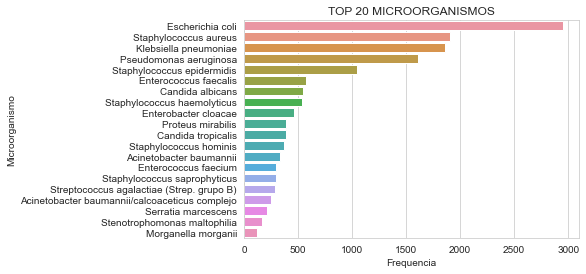

In [42]:
sns.barplot(df7.values, df7.index)
plt.title('TOP 20 MICROORGANISMOS')
plt.ylabel('Microorganismo')
plt.xlabel('Frequencia')
plt.rcParams["figure.figsize"] = [8, 8]
plt.show()

In [43]:
# dataset without filters
df5 = dfResLab.groupby(["CODIGO DE LA MUESTRA",'MICROORGANISMO']).size()
df6 = df5.reset_index(level=['MICROORGANISMO'])
df7 = df6['MICROORGANISMO'].value_counts().head(20)
df6['MICROORGANISMO'].value_counts().sum()

33061

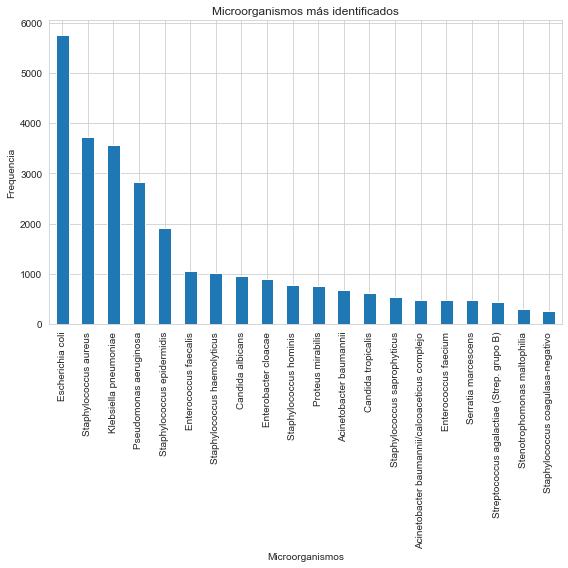

In [44]:
plt.rcParams["figure.figsize"] = [8, 8]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df6['MICROORGANISMO'].value_counts().head(20).plot(ax=ax, kind='bar', xlabel='Microorganismos', ylabel='Frequencia')
plt.title('Microorganismos más identificados')
plt.grid(True)

plt.show()

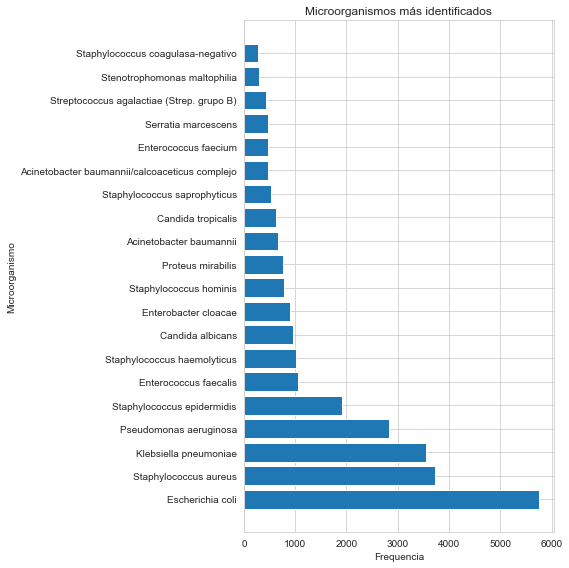

In [45]:
df7 = df6['MICROORGANISMO'].value_counts().head(20)
plt.barh(df7.index,df7.values)
plt.title('Microorganismos más identificados')
plt.ylabel('Microorganismo')
plt.xlabel('Frequencia')
plt.rcParams["figure.figsize"] = [8, 8]
plt.rcParams["figure.autolayout"] = True
plt.grid(True)
plt.show()


----

# EDA DATASET HEALTH EVENTS OF COMPULSORY NOTIFICATION

In [46]:
#dimensions of the dataset Notificaciones
nrowNot, ncolNot = dfNotObl.shape
nrowNot, ncolNot

(32430, 72)

In [47]:
dfNotObl.head(2)

,CÓDIGO DEL EVENTO,FECHA NOTIFICACIÓN,SEMANA,AÑO,COD_PRE,COD_SUB,TIPO IDENTIFICACIÓN,IDENTIFICACION,EDAD,UNIDAD DE MEDIDA,...,NOM_UPGD,PAÍS_PROCENCIA,DEPTO_PROCEDENCIA,MUN_PROCEDENCIA,PAÍS_RESIDENCIA,DEPTO_RESIDENCIA,MUN_RESIDENCIA,DEPTO_ NOTIFICACIÓN,MUN_NOTIFICACIÓN,NREG
0,115,3/07/2015,1,2015,7600103799,1,RC,1114159144,2,1,...,HOSPITAL UNIVERSITARIO DEL VALLE EVARISTO GARCIA,COLOMBIA,VALLE,CARTAGO,COLOMBIA,VALLE,CARTAGO,VALLE,CALI,2204
1,115,3/07/2015,1,2015,7600103799,1,TI,1006208411,12,1,...,HOSPITAL UNIVERSITARIO DEL VALLE EVARISTO GARCIA,COLOMBIA,CAUCA,TIMBIO,COLOMBIA,VALLE,CALI,VALLE,CALI,2053


In [48]:
# convert to datetime some columns
dfNotObl['FECHA NOTIFICACIÓN'] = dfNotObl['FECHA NOTIFICACIÓN'].astype(str).str[0:10]
dfNotObl['FECHA NOTIFICACIÓN'] = pd.to_datetime(dfNotObl['FECHA NOTIFICACIÓN'], dayfirst=True)

In [49]:
dfNotObl['FECHA HOSPITALIZACIÓN '] = dfNotObl['FECHA HOSPITALIZACIÓN '].astype(str).str[0:10]
dfNotObl['FECHA HOSPITALIZACIÓN '] = pd.to_datetime(dfNotObl['FECHA HOSPITALIZACIÓN '], dayfirst=True, errors='coerce')

In [50]:
dfNotObl['FECHA DEFUNCIÓN '] = dfNotObl['FECHA DEFUNCIÓN '].astype(str).str[0:10]
dfNotObl['FECHA DEFUNCIÓN '] = pd.to_datetime(dfNotObl['FECHA DEFUNCIÓN '], dayfirst=True, errors='coerce')

In [51]:
dfNotObl['FEC_AJUSTE'] = dfNotObl['FEC_AJUSTE'].astype(str).str[0:10]
dfNotObl['FEC_AJUSTE'] = pd.to_datetime(dfNotObl['FEC_AJUSTE'], dayfirst=True, errors='coerce')

In [52]:
dfNotObl['FEC_CON_'] = dfNotObl['FEC_CON_'].astype(str).str[0:10]
dfNotObl['FEC_CON_'] = pd.to_datetime(dfNotObl['FEC_CON_'], dayfirst=True, errors='coerce')

In [53]:
# dfNotObl Info
dfNotObl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32430 entries, 0 to 32429
Data columns (total 72 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CÓDIGO DEL EVENTO       32430 non-null  int64         
 1   FECHA NOTIFICACIÓN      32430 non-null  datetime64[ns]
 2   SEMANA                  32430 non-null  int64         
 3   AÑO                     32430 non-null  int64         
 4   COD_PRE                 32430 non-null  int64         
 5   COD_SUB                 32430 non-null  int64         
 6   TIPO IDENTIFICACIÓN     32430 non-null  object        
 7   IDENTIFICACION          32430 non-null  object        
 8   EDAD                    32430 non-null  int64         
 9   UNIDAD DE MEDIDA        32430 non-null  int64         
 10  CÓDIGO NACIONALIDAD     32430 non-null  object        
 11  NACIONALIDAD            32430 non-null  object        
 12  SEXO                    32430 non-null  object

## IDENTIFICATION VARIABLE

In [54]:
# IDENTIFICACION list
dfNotObl['IDENTIFICACION'].unique()

array(['1114159144', '1006208411', '97121902722', ..., '1067465198',
       '1110298366', '1235138222'], dtype=object)

In [55]:
# number of antibiotic
len(dfNotObl['IDENTIFICACION'].unique())

25524

In [56]:
# Number of Missing Values
dfNotObl['IDENTIFICACION'].isnull().sum()

0

## NOM_UPGD VARIABLE

In [57]:
# IDENTIFICACION list
dfNotObl['NOM_UPGD'].unique()

array(['HOSPITAL UNIVERSITARIO DEL VALLE EVARISTO GARCIA',
       'HOSPITAL UNIVERSITARIO DEL VALLE SEDE NORTE'], dtype=object)

In [58]:
# number of antibiotic
len(dfNotObl['NOM_UPGD'].unique())

2

In [59]:
# Number of Missing Values
dfNotObl['NOM_UPGD'].isnull().sum()

0

## AGE VARIABLE

In [60]:
# IDENTIFICACION list
dfNotObl['EDAD'].unique()

array([  2,  12,  37,  26,   8,  23,  50,   4,  13,  16,  20,  11,  33,
        30,  25,  55,   1,  24,  18,  34,  19,  15,   7,  41,  72,  31,
        82,  32,   9,  17,  21,  46,  48,  47,   3,  28,  52,  14,  40,
        22,  43,   5,  10,  38,  51,  53,   6,  39,  85,  27,  83,  56,
        58,  49,  42,  35,  62,  65,  45,  60,  66,  54,  64,  76,  36,
        29,  69,  78,  79,  63,  57,  70,  81,  75,  44,  74,  59,  73,
        68,  61,  80,  94,  97,  93,  67,  86,  77,  90,  84,  87,  71,
        89,  91,  88,  99,  95,  96,  92, 100,  98, 118,   0, 113, 104,
       101, 111, 110, 109], dtype=int64)

In [61]:
# number of antibiotic
len(dfNotObl['EDAD'].unique())

108

In [62]:
# Number of Missing Values
dfNotObl['EDAD'].isnull().sum()

0

## SEX

In [63]:
# IDENTIFICACION list
dfNotObl['SEXO'].unique()

array(['M', 'F', 'I'], dtype=object)

In [64]:
# number of antibiotic
len(dfNotObl['SEXO'].unique())

3

In [65]:
# Number of Missing Values
dfNotObl['SEXO'].isnull().sum()

0

## CAUSE OF DEATH

In [66]:
# IDENTIFICACION list
dfNotObl['CAUSA DEFUNCIÓN '].unique()

array(['SIN DATO', 'A162', 'A419', 'B24X', '9999', 'J159', 'B200', '8888',
       'B459', 'A920', 'A90X', 'O60X', 'J189', 'A418', 'B208', 'B59X',
       'K270', 'N740', 'R571', 'C403', 'B227', 'A199', 'A170', 'I219',
       'I252', 'B201', 'P210', 'J150', 'I693', 'G800', 'Q897', 'Q902',
       'Q248', 'Q02X', 'P021', 'Q000', 'P240', 'P000', 'P027', 'P209',
       'C349', 'C859', 'Q250', 'P399', 'Q793', 'Q780', 'C530', 'P018',
       'P293', 'P013', 'P280', 'Q899', 'P059', 'Q390', 'P025', 'P570',
       'Q038', 'I713', 'Q210', 'P77X', 'Q259', 'Q249', 'P832', 'P292',
       'G629', 'P523', 'A41', 'P022', 'P289', 'P211', 'Q332', 'P011',
       'G039', 'Q999', 'P251', 'I64X', 'P002', 'Q792', 'T312', 'P285',
       'K922', 'P700', 'Q049', 'N390', 'A183', 'Q878', 'J969', 'A509',
       'X689', 'P269', 'X680', 'P95X', 'O459', 'I509', 'C58X', 'P368',
       'C752', 'E109', 'O421', 'P220', 'Q439', 'Q079', 'P072', 'O95X',
       'D573', 'P219', 'J069', 'O429', 'J210', 'O711', 'Q606', 'O285',
   

In [67]:
# number of antibiotic
len(dfNotObl['CAUSA DEFUNCIÓN '].unique())

233

In [68]:
# Number of Missing Values
dfNotObl['CAUSA DEFUNCIÓN '].isnull().sum()

0

## HOSPITALIZED

In [69]:
# IDENTIFICACION list
dfNotObl['HOSPITALIZADO'].unique()

array(['1', '2', 'SIN DATO'], dtype=object)

In [70]:
# number of antibiotic
len(dfNotObl['HOSPITALIZADO'].unique())

3

In [71]:
# Number of Missing Values
dfNotObl['HOSPITALIZADO'].isnull().sum()

0

## FILTER AND PLOTING CAUSE OF DEATH VARIABLE

In [72]:
dfNew = dfNotObl.groupby(['NREG','CAUSA DEFUNCIÓN ']).size()
dfNew1 = dfNew.reset_index(level=['CAUSA DEFUNCIÓN '])
dfNew2 = dfNew1['CAUSA DEFUNCIÓN '].value_counts()
dfNew3 = pd.DataFrame({'Causa':dfNew2.index, 'Conteo':dfNew2.values})
dfNew3 = dfNew3.head(10)

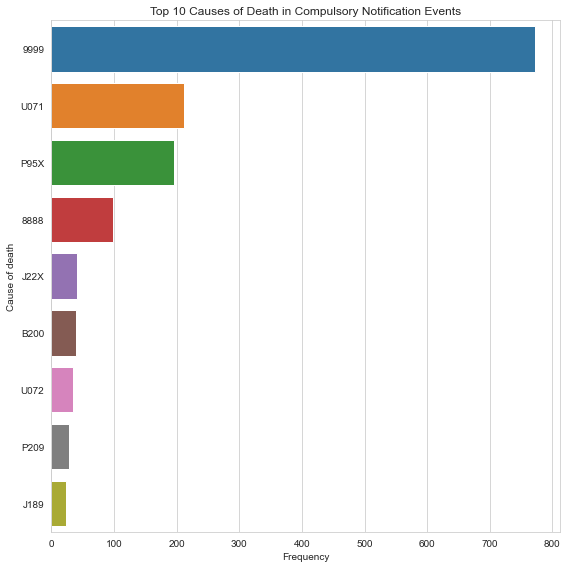

In [73]:
dfNew3 = dfNew3[dfNew3["Causa"]!="SIN DATO"]
sns.barplot(dfNew3.Conteo, dfNew3.Causa)
plt.title('Top 10 Causes of Death in Compulsory Notification Events')
plt.ylabel('Cause of death')
plt.xlabel('Frequency')
plt.rcParams["figure.figsize"] = [7, 7]
plt.show()

## FILTER AND PLOTING SEX VARIABLE


In [74]:
dfNew = dfNotObl.groupby(['NREG','SEXO']).size()
dfNew1 = dfNew.reset_index(level=['SEXO'])
dfNew2 = dfNew1['SEXO'].value_counts()
dfNew3 = pd.DataFrame({'sexo':dfNew2.index, 'Conteo':dfNew2.values})

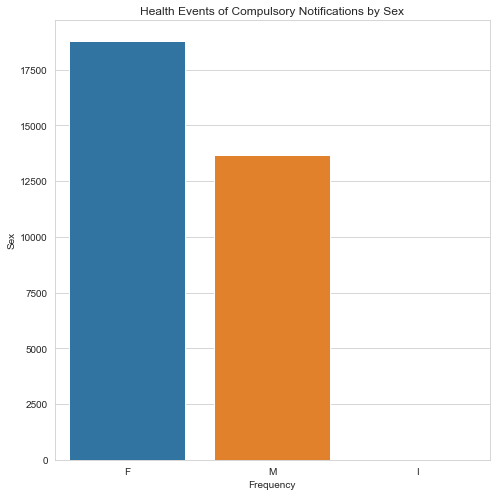

In [75]:
sns.barplot(dfNew3.sexo, dfNew3.Conteo)
plt.title('Health Events of Compulsory Notifications by Sex')
plt.ylabel('Sex')
plt.xlabel('Frequency')
plt.rcParams["figure.figsize"] = [7, 7]
plt.show()

## FILTER AND PLOTING AGE VARIABLE

In [76]:
dfNew = dfNotObl.groupby(['NREG','EDAD']).size()
dfNew1 = dfNew.reset_index(level=['EDAD'])
dfNew2 = dfNew1['EDAD'].value_counts().head(35)
dfNew3 = pd.DataFrame({'edad':dfNew2.index, 'Conteo':dfNew2.values})

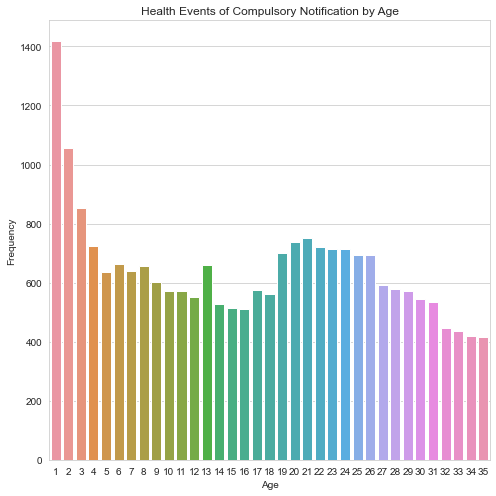

In [77]:
sns.barplot(x='edad', y ='Conteo', data=dfNew3)
plt.title("Health Events of Compulsory Notification by Age")
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.rcParams["figure.figsize"] = [8,8]
plt.show()

## HISTOGRAM AGE VARIABLE

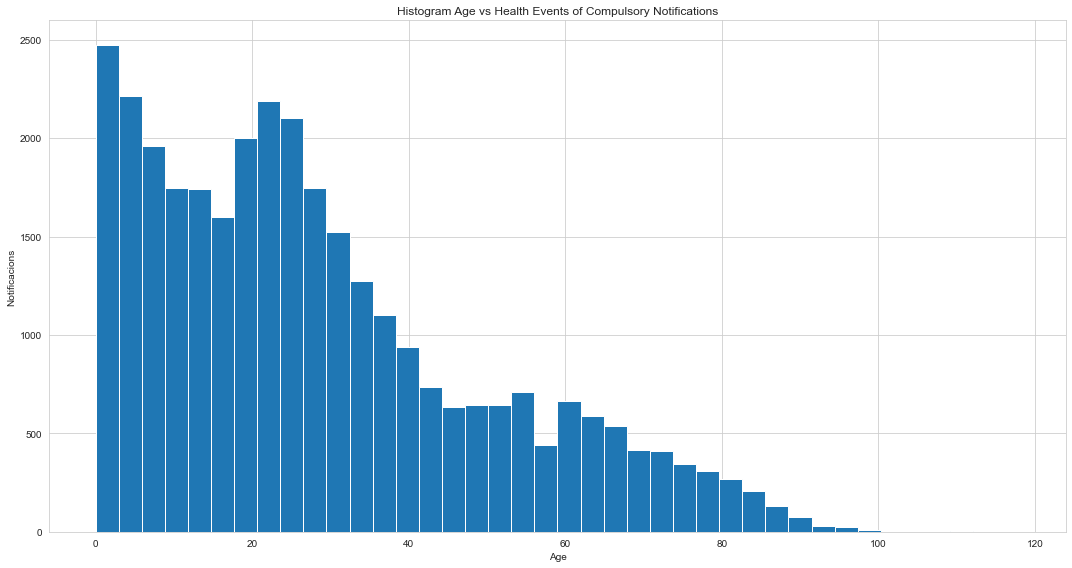

In [78]:
plt.figure(figsize=(15,8))
plt.hist(dfNotObl['EDAD'],bins=40)
plt.title('Histogram Age vs Health Events of Compulsory Notifications')
plt.xlabel('Age')
plt.ylabel('Notificacions')
plt.show()

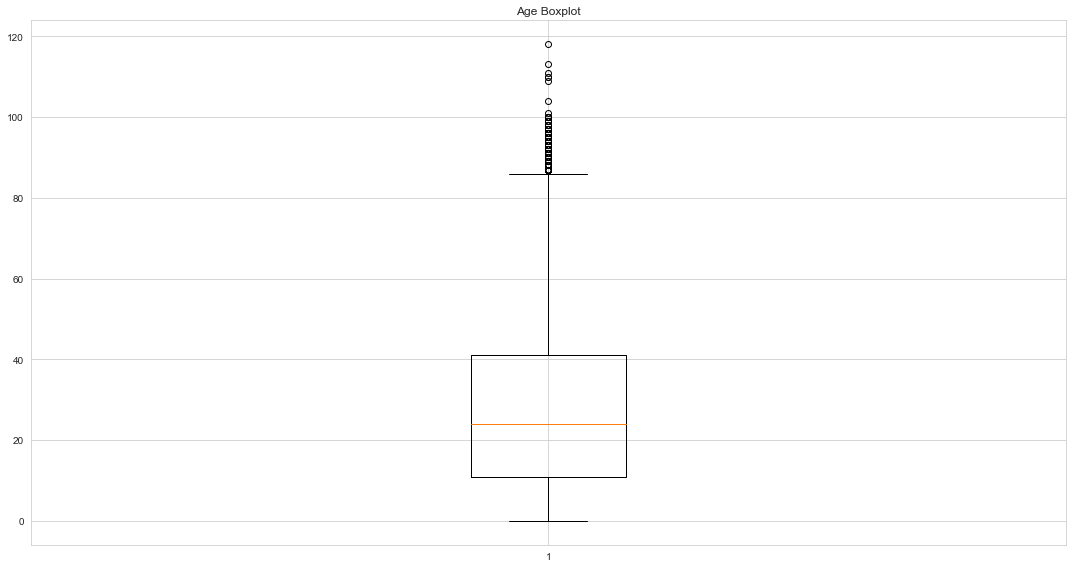

In [79]:
plt.figure(figsize=(15,8))
plt.boxplot(dfNotObl ['EDAD'])
plt.title("Age Boxplot")
plt.show()

In [80]:
ed=dfNotObl [["EDAD","NREG"]].groupby("EDAD").count()
edad=ed.reset_index()
print('The average notification by age is: ',ed.mean())
edad.head(20)

The average notification by age is:  NREG    300.277778
dtype: float64


,EDAD,NREG
0,0,2
1,1,1417
2,2,1055
3,3,854
4,4,723
5,5,636
6,6,664
7,7,640
8,8,655
9,9,603


##NUMBER OF NOTIFICATIONS PER WEEK

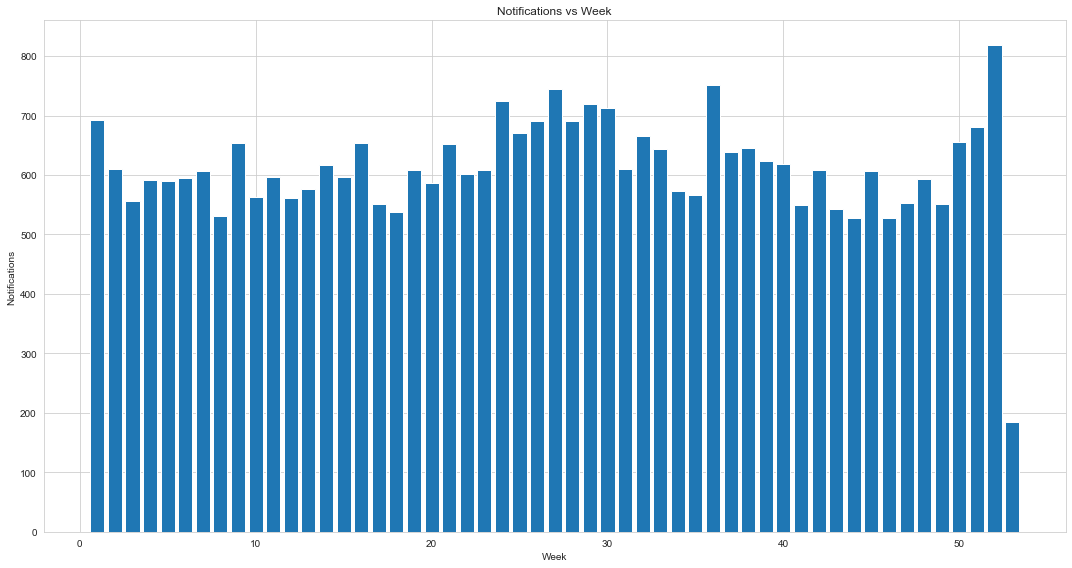

In [81]:
semana=dfNotObl [['SEMANA','NREG']].groupby(['SEMANA']).count()
a=semana.reset_index()
plt.figure(figsize=(15,8))
plt.bar(a['SEMANA'],a['NREG'])
plt.ylabel('Notifications')
plt.xlabel('Week')
plt.title('Notifications vs Week')
plt.show()

In [82]:
print('Week during which the most notifications were issued: ',semana[semana['NREG']==semana['NREG'].max()])
print('Week during which the least notifications were issued: ',semana[semana['NREG']==semana['NREG'].min()])

Week during which the most notifications were issued:          NREG
SEMANA      
52       819
Week during which the least notifications were issued:          NREG
SEMANA      
53       185


## HAI EVENTS

In [83]:
#Selection of events related to HAIs
HAI_codes=[351,352,354, 357, 359,362]
s=dfNotObl [['CÓDIGO DEL EVENTO','NREG']].groupby(['CÓDIGO DEL EVENTO']).count()
s=s.reset_index()
s[s['CÓDIGO DEL EVENTO'].isin(HAI_codes)]

,CÓDIGO DEL EVENTO,NREG
27,351,14
28,352,79
31,357,1217


# EDA RUAF DATASET

In [84]:
#dimensions of the dataset Notificaciones
nrowRuaf, ncolRuaf = dfRuaf.shape
nrowRuaf, ncolRuaf

(9553, 82)

In [85]:
dfRuaf.head(2)

,NÚMERO CERTIFICADO,DEPARTAMENTO,MUNICIPIO,AREA DEFUNCIÓN,INSPECCIÓN CORREGIMIENTO O CASERIO DEFUNCIÓN,SITIO DEFUNCIÓN,CÓDIGO INSTITUCIÓN,NOMBRE INSTITUCIÓN,TIPO DEFUNCIÓN,FECHA DEFUNCIÓN,...,TIPO PROFESIONAL,REGISTRO PROFESIONAL,DEPARTAMENTO EXPEDICIÓN,MUNICIPIO EXPEDICIÓN,FECHA EXPEDICIÓN,ESTADO CERTIFICADO,CÓDIGO ENTIDAD REGISTRÓ,USUARIO REGISTRÓ,ÚLTIMA FECHA MODIFICACIÓN,FECHA REGISTRO
0,710159431.0,VALLE DEL CAUCA,CALI,CABECERA MUNICIPAL,NaN,HOSPITAL/CLÍNICA,7.600104e+11,760010379901 E.S.E. HOSPITAL UNIVERSITARIO DEL...,FETAL,1/01/2016,...,MÉDICO,766711-11,VALLE DEL CAUCA,CALI,1/01/2016,CONFIRMADO,760010379901,STGUEVARAFR,1/01/2016,1/01/2016
1,710159449.0,VALLE DEL CAUCA,CALI,CABECERA MUNICIPAL,NaN,CASA/DOMICILIO,7.600104e+11,760010379901 E.S.E. HOSPITAL UNIVERSITARIO DEL...,NO FETAL,2/01/2016,...,MÉDICO,10350,VALLE DEL CAUCA,CALI,7/01/2016,CONFIRMADO,760010379901,CATABORDAA,7/01/2016,7/01/2016


In [86]:
# convert to datetime some columns
dfRuaf['FECHA DEFUNCIÓN'] = dfRuaf['FECHA DEFUNCIÓN'].astype(str).str[0:10]
dfRuaf['FECHA DEFUNCIÓN'] = pd.to_datetime(dfRuaf['FECHA DEFUNCIÓN'], dayfirst=True, errors = 'coerce')

In [87]:
dfRuaf['FECHA EXPEDICIÓN'] = dfRuaf['FECHA EXPEDICIÓN'].astype(str).str[0:10]
dfRuaf['FECHA EXPEDICIÓN'] = pd.to_datetime(dfRuaf['FECHA EXPEDICIÓN'], dayfirst=True, errors = 'coerce')

In [88]:
# dfRuaf Info
dfRuaf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9553 entries, 0 to 9552
Data columns (total 82 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   NÚMERO CERTIFICADO                            9552 non-null   float64       
 1   DEPARTAMENTO                                  9552 non-null   object        
 2   MUNICIPIO                                     9552 non-null   object        
 3   AREA DEFUNCIÓN                                9550 non-null   object        
 4   INSPECCIÓN CORREGIMIENTO O CASERIO DEFUNCIÓN  8 non-null      object        
 5   SITIO DEFUNCIÓN                               9552 non-null   object        
 6   CÓDIGO INSTITUCIÓN                            9552 non-null   float64       
 7   NOMBRE INSTITUCIÓN                            9552 non-null   object        
 8   TIPO DEFUNCIÓN                                9552 non-null   object

In [89]:
# unique data for unit of measurement
dfRuaf['UNIDAD DE MEDIDA'].unique()

array(['SIN ESPECIFICAR', '4', '2', '1', '3', '0'], dtype=object)

## AGE VARIABLE

As there are 6 units of measurement for ages, some important values are highlighted within each unit of measurement.

We remove what appears to be 'SIN IDENTIFICAR' in order to obtain some measurements concerning the ages and their respective units of measurement.

Text(0.5, 1.0, 'Age by Unit of Measurement')

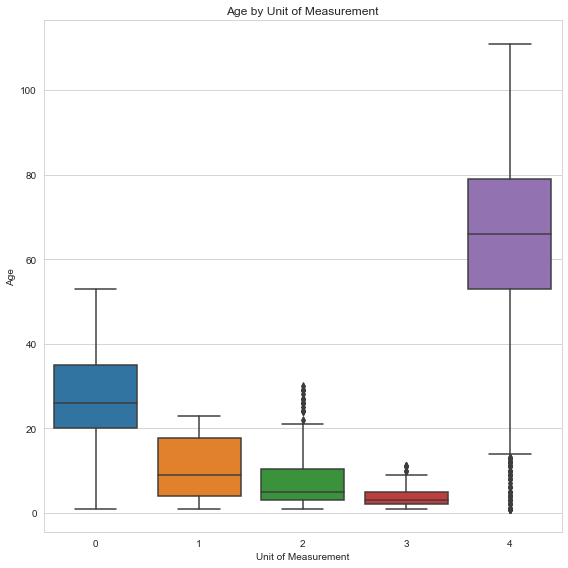

In [90]:
indexNames = dfRuaf[dfRuaf['EDAD '] == 'SIN ESPECIFICAR' ].index
# Delete these row indexes from dataFrame
dfRuaf.drop(indexNames , inplace=True)
sns.boxplot(x=dfRuaf["UNIDAD DE MEDIDA"].astype(int), y=dfRuaf["EDAD "].astype(int))
plt.ylabel('Age')
plt.xlabel('Unit of Measurement')
plt.title('Age by Unit of Measurement')


For this case the units of measurement are as follows:

0 = years
1 = months
2 = days
3 = hours
4 = minutes

## DEATH SITE VARIABLE

In [91]:
# IDENTIFICACION list
dfRuaf['SITIO DEFUNCIÓN'].unique()

array(['CASA/DOMICILIO', 'HOSPITAL/CLÍNICA', 'OTRO SITIO', 'VÍA PÚBLICA',
       'CENTRO/PUESTO DE SALUD'], dtype=object)

In [92]:
# number of antibiotic
len(dfRuaf['SITIO DEFUNCIÓN'].unique())

5

In [93]:
# Number of Missing Values
dfRuaf['SITIO DEFUNCIÓN'].isnull().sum()

0

## TYPE OF DEATH VARIABLE

In [94]:
# IDENTIFICACION list
dfRuaf['TIPO DEFUNCIÓN'].unique()

array(['NO FETAL'], dtype=object)

In [95]:
# number of antibiotic
len(dfRuaf['TIPO DEFUNCIÓN'].unique())

1

In [96]:
# Number of Missing Values
dfRuaf['TIPO DEFUNCIÓN'].isnull().sum()

0

## ANTECEDENT CAUSE B

In [97]:
# CAUSE B list
dfRuaf['CAUSA ANTECEDENTES B'].unique()

array(['NEUTROPENIA SEVERA', 'DIABETES MELLITUS', 'TUBERCULOSIS PULMONAR',
       ..., 'DIABETES MELLITUS INSULINODEPENDIENTE',
       'TROMBOCITONIA SEVERA', 'DIFICULTAD RESPIRATORIA SEVERA'],
      dtype=object)

In [98]:
# number of CAUSE B
len(dfRuaf['CAUSA ANTECEDENTES B'].unique())

3168

In [99]:
# Number of Missing Values
dfRuaf['CAUSA ANTECEDENTES B'].isnull().sum()

0

## ANTECEDENT CAUSE C

In [100]:
# CAUSE C list
dfRuaf['CAUSA ANTECEDENTES C'].unique()

array(['LUPUS ERITEMATOSO SISTEMICO ACTIVO', 'HIPERTENSION ARTERIAL',
       'INFECCION DEL VIH RESULTANTE EN MULTIPLES COMPLICACIONES', ...,
       'PERFORACION DE COLON SIGMOIDES ESPONTANEO',
       'TUMOR MALIGNO DE ENDOMETRIO',
       'SINDROME INFLAMATORIO DE RECONSTITUCION INMUNE'], dtype=object)

In [101]:
# number of CAUSE C
len(dfRuaf['CAUSA ANTECEDENTES C'].unique())

2497

In [102]:
# Number of Missing Values
dfRuaf['CAUSA ANTECEDENTES C'].isnull().sum()

0

## ANTECEDENT CAUSE D

In [103]:
# CAUSE D list
dfRuaf['CAUSA ANTECEDENTES D'].unique()

array(['SIN ESPECIFICAR', 'LEISHMANIASIS', 'HIPERTENSION ARTERIAL', ...,
       'ULCERA SACRA GRADO IV', 'RUPTURA DE ESOFAGO PROXIMAL', 'DEMENCIA'],
      dtype=object)

In [104]:
# number of CAUSE C
len(dfRuaf['CAUSA ANTECEDENTES D'].unique())

1097

In [105]:
# Number of Missing Values
dfRuaf['CAUSA ANTECEDENTES D'].isnull().sum()

0

## PATOLOGIC STATUS

In [106]:
# PATOLOGIC STATUS list
dfRuaf['ESTADOS PATOLÓGICOS'].unique()

array(['SIN ESPECIFICAR', 'DUCTUS ARTERIOSO PERSISTENTE',
       'INSUFICIENCIA CARDIACA CONGESTIVA', ...,
       'HIPERTENSION ARTERIAL INSUFICIENCIA HEPATICA',
       'TOXOPLASMOSIS CEREBRAL EN ESTUDIO NEUROLUES TRATADA',
       'INFARTO MESENCEFALICO MENINGITIS BACTERIANA CON SECUELAS EN LA NIÑEZ'],
      dtype=object)

In [107]:
# number of PATOLOGIC STATUS
len(dfRuaf['ESTADOS PATOLÓGICOS'].unique())

2696

In [108]:
# Number of Missing Values
dfRuaf['ESTADOS PATOLÓGICOS'].isnull().sum()

0

## PROBABLE MANNER OF DEATH

In [109]:
# PROBABLE MANNER OF DEATH list
dfRuaf['PROBABLE MANERA MUERTE'].unique()

array(['NATURAL', 'EN ESTUDIO', 'VIOLENTA'], dtype=object)

In [110]:
# number of PATOLOGIC STATUS
len(dfRuaf['PROBABLE MANERA MUERTE'].unique())

3

In [111]:
# Number of Missing Values
dfRuaf['PROBABLE MANERA MUERTE'].isnull().sum()

0

## DIRECT CAUSE VARIABLE

In [112]:
# IDENTIFICACION list
dfRuaf['CAUSA DIRECTA'].unique()

array(['CHOQUE SEPTICO', 'EVENTO CEREBROVASCULAR ISQUEMICO', 'SEPTICEMIA',
       ..., 'CHOQUE SEPTICO DE ORIGE URINARIO',
       'CARCINOMA MUCOEPIDERMOIDE DE ALTO GRADO ESTADIO IV',
       'CETOACIDOSIS DIABÉTICA'], dtype=object)

In [113]:
# number of antibiotic
len(dfRuaf['CAUSA DIRECTA'].unique())

2503

In [114]:
# Number of Missing Values
dfRuaf['CAUSA DIRECTA'].isnull().sum()

0

## FILTER AND PLOTING  ANTECEDENT CAUSE B VARIABLE

In [115]:
dfNew = dfRuaf.groupby(['NÚMERO CERTIFICADO','CAUSA ANTECEDENTES B']).size()
dfNew1 = dfNew.reset_index(level=['CAUSA ANTECEDENTES B'])
dfNew2 = dfNew1['CAUSA ANTECEDENTES B'].value_counts()
dfNew2.head(20)
dfNew3 = pd.DataFrame({'Causa_B':dfNew2.index, 'Conteo':dfNew2.values})
dfNew3 = dfNew3.head(20)

In [116]:
dfNew = dfRuaf.groupby(['NÚMERO CERTIFICADO','CAUSA ANTECEDENTES B']).size()
dfNew1 = dfNew.reset_index(level=['CAUSA ANTECEDENTES B'])
dfNew2 = dfNew1['CAUSA ANTECEDENTES B'].value_counts()
dfNew2.head(20)
dfNew3 = pd.DataFrame({'Causa_B':dfNew2.index, 'Conteo':dfNew2.values})
dfNew3 = dfNew3.head(20)

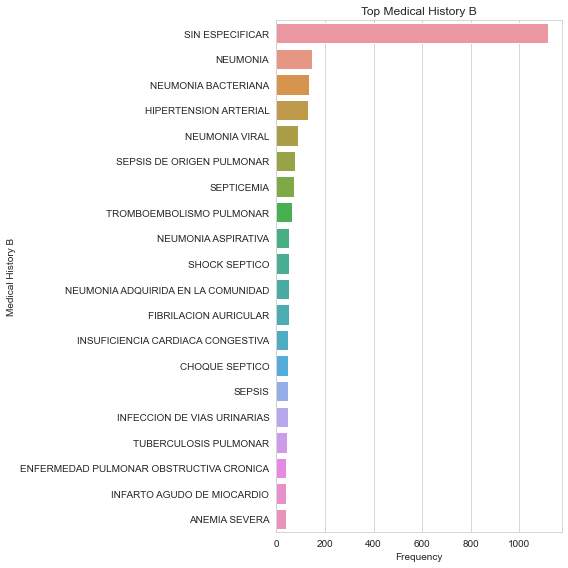

In [117]:
sns.barplot(dfNew3.Conteo, dfNew3.Causa_B)
plt.title('Top Medical History B')
plt.ylabel('Medical History B')
plt.xlabel('Frequency')
plt.rcParams["figure.figsize"] = [7, 7]
plt.show()

## FILTER AND PLOTING  ANTECEDENT CAUSE C VARIABLE

In [118]:
dfNew = dfRuaf.groupby(['NÚMERO CERTIFICADO','CAUSA ANTECEDENTES C']).size()
dfNew1 = dfNew.reset_index(level=['CAUSA ANTECEDENTES C'])
dfNew2 = dfNew1['CAUSA ANTECEDENTES C'].value_counts()
dfNew3 = pd.DataFrame({'Causa_C':dfNew2.index, 'Conteo':dfNew2.values})
dfNew3 = dfNew3.head(20)

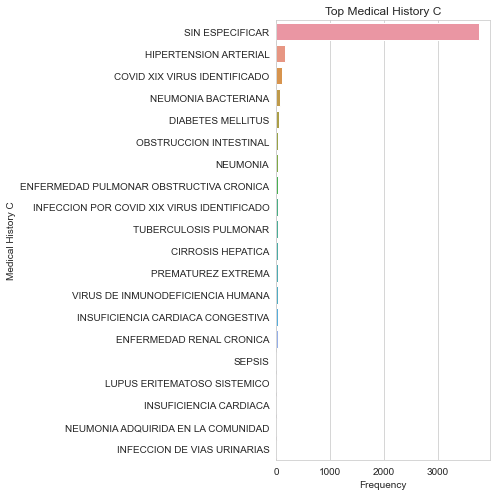

In [119]:
sns.barplot(dfNew3.Conteo, dfNew3.Causa_C)
plt.title('Top Medical History C')
plt.ylabel('Medical History C')
plt.xlabel('Frequency')
plt.rcParams["figure.figsize"] = [7, 7]
plt.show()

## FILTER AND PLOTING  ANTECEDENT CAUSE D VARIABLE

In [120]:
dfNew = dfRuaf.groupby(['NÚMERO CERTIFICADO','CAUSA ANTECEDENTES D']).size()
dfNew1 = dfNew.reset_index(level=['CAUSA ANTECEDENTES D'])
dfNew2 = dfNew1['CAUSA ANTECEDENTES D'].value_counts()
dfNew3 = pd.DataFrame({'Causa_D':dfNew2.index, 'Conteo':dfNew2.values})
dfNew3 = dfNew3.head(20)

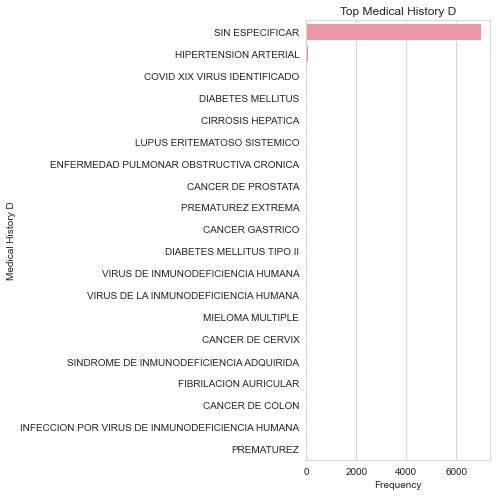

In [121]:
sns.barplot(dfNew3.Conteo, dfNew3.Causa_D)
plt.title('Top Medical History D')
plt.ylabel('Medical History D')
plt.xlabel('Frequency')
plt.rcParams["figure.figsize"] = [7, 7]
plt.show()

## FILTER AND PLOTING  ANTECEDENT PATOLOGIC STATUS VARIABLE

In [122]:
dfNew = dfRuaf.groupby(['NÚMERO CERTIFICADO','CAUSA ANTECEDENTES D']).size()
dfNew1 = dfNew.reset_index(level=['CAUSA ANTECEDENTES D'])
dfNew2 = dfNew1['CAUSA ANTECEDENTES D'].value_counts()
dfNew3 = pd.DataFrame({'Causa_D':dfNew2.index, 'Conteo':dfNew2.values})
dfNew3 = dfNew3.head(20)

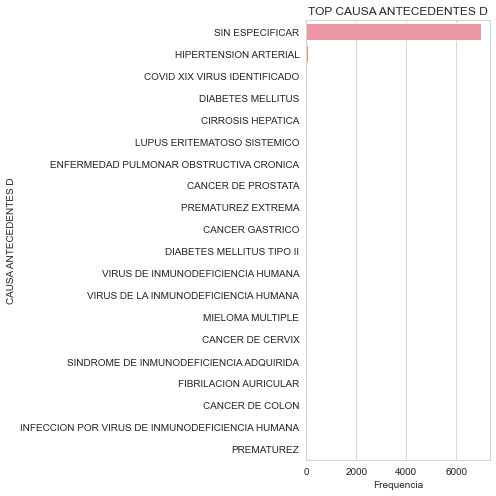

In [123]:
sns.barplot(dfNew3.Conteo, dfNew3.Causa_D)
plt.title('TOP CAUSA ANTECEDENTES D')
plt.ylabel('CAUSA ANTECEDENTES D')
plt.xlabel('Frequencia')
plt.rcParams["figure.figsize"] = [7, 7]
plt.show()

## FILTER AND PLOTING PROBABLE MANNER OF DEATH VARIABLE

In [124]:
dfNew = dfRuaf.groupby(['NÚMERO CERTIFICADO','PROBABLE MANERA MUERTE']).size()
dfNew1 = dfNew.reset_index(level=['PROBABLE MANERA MUERTE'])
dfNew2 = dfNew1['PROBABLE MANERA MUERTE'].value_counts()
dfNew3 = pd.DataFrame({'Causa':dfNew2.index, 'Conteo':dfNew2.values})
dfNew3 = dfNew3.head(20)

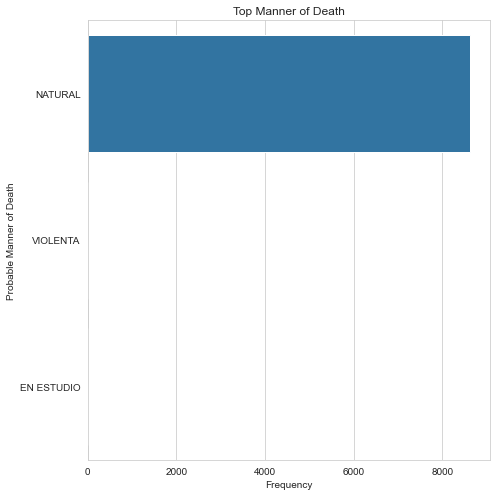

In [125]:
sns.barplot(dfNew3.Conteo, dfNew3.Causa)
plt.title('Top Manner of Death')
plt.ylabel('Probable Manner of Death')
plt.xlabel('Frequency')
plt.rcParams["figure.figsize"] = [7, 7]
plt.show()

## FILTER AND PLOTING DEATH SITE VARIABLE

In [126]:
dfNew = dfRuaf.groupby(['NÚMERO CERTIFICADO','SITIO DEFUNCIÓN']).size()
dfNew1 = dfNew.reset_index(level=['SITIO DEFUNCIÓN'])
dfNew2 = dfNew1['SITIO DEFUNCIÓN'].value_counts()
dfNew3 = pd.DataFrame({'Sitio':dfNew2.index, 'Conteo':dfNew2.values})
dfNew3 = dfNew3.head(20)

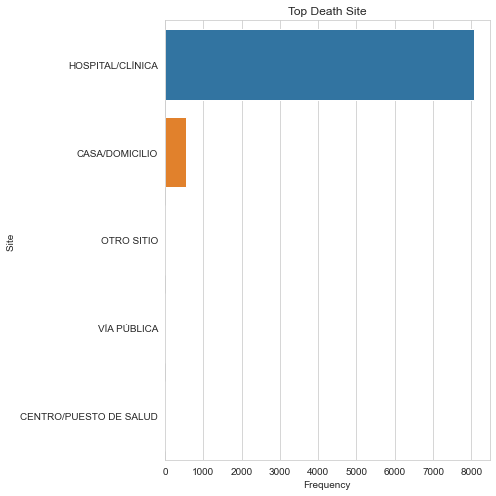

In [127]:
sns.barplot(dfNew3.Conteo, dfNew3.Sitio)
plt.title('Top Death Site')
plt.ylabel('Site ')
plt.xlabel('Frequency')
plt.rcParams["figure.figsize"] = [7, 7]
plt.show()

## FILTER AND PLOTING TYPE OF DEATH VARIABLE

In [128]:
dfNew = dfRuaf.groupby(['NÚMERO CERTIFICADO','TIPO DEFUNCIÓN']).size()
dfNew1 = dfNew.reset_index(level=['TIPO DEFUNCIÓN'])
dfNew2 = dfNew1['TIPO DEFUNCIÓN'].value_counts()
dfNew3 = pd.DataFrame({'Sitio':dfNew2.index, 'Conteo':dfNew2.values})
dfNew3 = dfNew3.head(20)

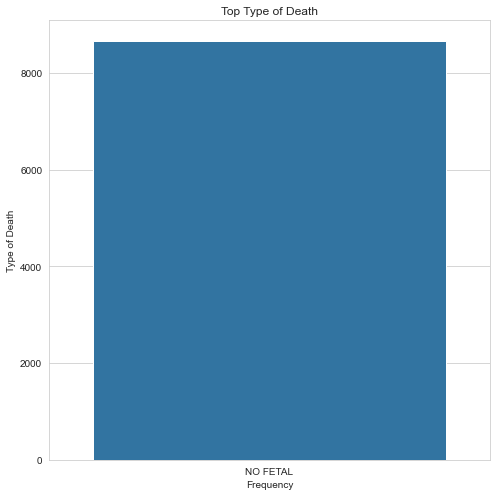

In [129]:
sns.barplot( dfNew3.Sitio, dfNew3.Conteo)
plt.title('Top Type of Death')
plt.ylabel('Type of Death')
plt.xlabel('Frequency')
plt.rcParams["figure.figsize"] = [7, 7]
plt.show()

## FILTER AND PLOTING DIRECT CAUSE VARIABLE

In [130]:
dfNew = dfRuaf.groupby(['NÚMERO CERTIFICADO','CAUSA DIRECTA']).size()
dfNew1 = dfNew.reset_index(level=['CAUSA DIRECTA'])
dfNew2 = dfNew1['CAUSA DIRECTA'].value_counts()
dfNew3 = pd.DataFrame({'Sitio':dfNew2.index, 'Conteo':dfNew2.values})
dfNew3 = dfNew3.head(20)

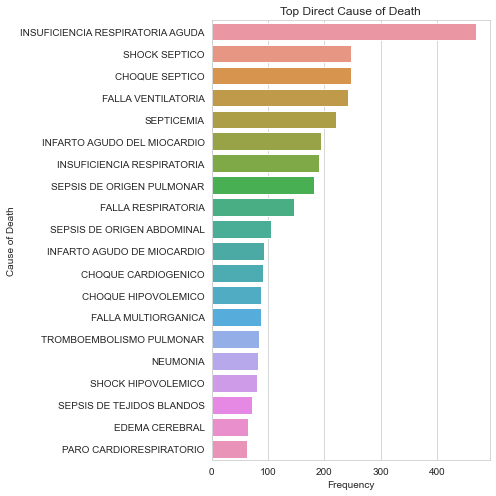

In [131]:
sns.barplot(dfNew3.Conteo, dfNew3.Sitio)
plt.title('Top Direct Cause of Death')
plt.ylabel('Cause of Death')
plt.xlabel('Frequency')
plt.rcParams["figure.figsize"] = [7, 7]
plt.show()

----

# MERGE DATAFRAMES


In [132]:
# Merging Data Sets Laboratory Results and Mandatory Notifications
dfMergeLabNot = pd.merge(dfResLab,dfNotObl,on='IDENTIFICACION')
dfMergeLabNot.shape[0] #Número de Filas de resultados laboratorio en los que cruzo con Notificaciones

243893

In [133]:
result = len(pd.unique(dfMergeLabNot['IDENTIFICACION'])) #Se cuentan los valores unicos, es decir cuantas identificaciones aparecen
#en la base de laboratorio que aparecen en la Base de notificaciones sin tener en cuenta duplicados
print(result) #Pacientes que se encontraron en el cruce

3387


In [134]:
df_cross = pd.get_dummies(dfResLab, columns=['MICROORGANISMO','ANTIBIOTICO','SENSIBLE / RESISTENTE / INTERMEDIO'], sparse=True)
df_cross

,FECHA DE TOMA DE MUESTRA,IDENTIFICACION,CODIGO DE LA MUESTRA,FECHA DE NACIMIENTO,GENERO,TIPO DE MUESTRA,SALA,LA CONCENTRACION MINIMA O MAX,HOSPILTAL,NUMERO DE AISLAMIENTO,...,ANTIBIOTICO_Vancomicina,ANTIBIOTICO_Voriconazol,ANTIBIOTICO_Ácido fusídico,ANTIBIOTICO_Ácido nalidíxico,SENSIBLE / RESISTENTE / INTERMEDIO_I,SENSIBLE / RESISTENTE / INTERMEDIO_N,SENSIBLE / RESISTENTE / INTERMEDIO_R,SENSIBLE / RESISTENTE / INTERMEDIO_S,SENSIBLE / RESISTENTE / INTERMEDIO_SIN ESPECIFICAR,SENSIBLE / RESISTENTE / INTERMEDIO_X
0,2013-12-10,2232117,13-11366-S,SIN DATO,SIN ESPECIFICAR,HEMOCULTIVO PUNCION PERIFERICA,recien nacidos (cirena),<=8,HOSPITAL UNIVERSITARIO DEL VALLE,1,...,0,0,0,0,0,0,0,1,0,0
1,2013-12-10,2232117,13-11366-S,SIN DATO,SIN ESPECIFICAR,HEMOCULTIVO PUNCION PERIFERICA,recien nacidos (cirena),8/4,HOSPITAL UNIVERSITARIO DEL VALLE,1,...,0,0,0,0,0,0,0,1,0,0
2,2013-12-10,2232117,13-11366-S,SIN DATO,SIN ESPECIFICAR,HEMOCULTIVO PUNCION PERIFERICA,recien nacidos (cirena),>16,HOSPITAL UNIVERSITARIO DEL VALLE,1,...,0,0,0,0,0,0,1,0,0,0
3,2013-12-10,2232117,13-11366-S,SIN DATO,SIN ESPECIFICAR,HEMOCULTIVO PUNCION PERIFERICA,recien nacidos (cirena),<=2,HOSPITAL UNIVERSITARIO DEL VALLE,1,...,0,0,0,0,0,0,0,1,0,0
4,2013-12-10,2232117,13-11366-S,SIN DATO,SIN ESPECIFICAR,HEMOCULTIVO PUNCION PERIFERICA,recien nacidos (cirena),16,HOSPITAL UNIVERSITARIO DEL VALLE,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546438,2021-07-30,30744000,107300456.57,04/07/1969,Femenino,SEC. PIEL Y TEJIDOS BLANDOS,unidad de cuidado intensivo 4,>4,HOSPITAL UNIVERSITARIO DEL VALLE,1,...,0,0,0,0,0,0,0,0,1,0
546439,2021-07-30,30744000,107300456.57,04/07/1969,Femenino,SEC. PIEL Y TEJIDOS BLANDOS,unidad de cuidado intensivo 4,4/76,HOSPITAL UNIVERSITARIO DEL VALLE,1,...,0,0,0,0,0,0,0,0,1,0
546440,2021-10-29,24999535,110290032.35,25/10/1955,Femenino,Orina,4 piso uci trasplantes,SIN ESPECIFICAR,HOSPITAL UNIVERSITARIO DEL VALLE,1,...,0,0,0,0,0,0,0,0,1,0
546441,2021-03-28,1239688398,103280420.35,04/09/2020,Masculino,ORINA POR SONDA VESICAL,pediatria urgencias,<=8,HOSPITAL UNIVERSITARIO DEL VALLE,1,...,0,0,0,0,0,0,0,1,0,0


In [135]:
dfRuaf.rename(columns={"NÚMERO DOCUMENTO ":"IDENTIFICACION"}, inplace = True)

In [136]:
dfMergeLabRuaf = pd.merge(dfResLab,dfRuaf,on='IDENTIFICACION')
dfMergeLabRuaf.shape[0] #Registros que cruzaron de laboratorio con la base RUAF

99299

In [137]:
result = len(pd.unique(dfMergeLabRuaf['IDENTIFICACION'])) #Se cuentan los valores unicos, es decir cuantas identificaciones de
#resultados de laboratorio aparecen en la Base RUAF sin tener en cuenta duplicados
print(result) #Pacientes que se encontraron en el cruce

2482


In [138]:
dfMergeNotRuaf = pd.merge(dfNotObl,dfRuaf,on="IDENTIFICACION")
dfMergeNotRuaf.shape[0]  #Registros que cruzaron de Notificaciones con la base RUAF

3498

In [139]:
result = len(pd.unique(dfMergeNotRuaf['IDENTIFICACION'])) #Se cuentan los valores unicos, es decir cuantas identificaciones de
#Notificaciones aparecen en la Base RUAF sin tener en cuenta duplicados
print(result) #Pacientes que se encontraron en el cruce

2463


The previous joining the dataset of health events of compulsory notification and the datset of death certificates, results in a similar number of record as the result from joining the dataset of laboratory results with the dataset of of death certificates. This can be considered a good indication. 

#MERGE DATAFRAMES KEEPING ALL PATIENTS

In [140]:
#Merge lab results with death certificates keeping all patients
dfMergeLabRuafI = pd.merge(dfResLab, dfRuaf, how= "left", on='IDENTIFICACION', indicator=True)
dfMergeLabRuafI["FALLECIO"] = dfMergeLabRuafI["_merge"]
dfMergeLabRuafI["FALLECIO"].replace({"left_only":"No", "both":"Si"}, inplace=True)
print(dfMergeLabRuafI["IDENTIFICACION"].nunique())
dfMergeLabRuafI[dfMergeLabRuafI["FALLECIO"]=="Si"]["IDENTIFICACION"].nunique()

16095


2482

In [141]:
#Microorganism by death status
contingency_table1 = pd.crosstab(index=dfMergeLabRuafI["FAMILIA_MICROORGANISMO"], columns=dfMergeLabRuafI["FALLECIO"], normalize="index")*100
contingency_table1

FALLECIO,No,Si
FAMILIA_MICROORGANISMO,,
,100.000000,0.000000
Actinomycetaceae,100.000000,0.000000
Aeromonadaceae,83.958763,16.041237
Bacillales,86.486486,13.513514
Brucellaceae,100.000000,0.000000
Burkholderiales,68.683997,31.316003
Candidas,68.826291,31.173709
Caulobacteraceae,93.333333,6.666667
Corynebacteriaceae,74.742268,25.257732


In [142]:
#Merge of lab results and compulsory notification keeping all patients
dfNotObl.rename(columns={"IDENTIFICACIÓN":"IDENTIFICACION"}, inplace=True)
dfMergeLabNotI = pd.merge(dfResLab, dfNotObl, how="left", on='IDENTIFICACION', indicator=True)
dfMergeLabNotI["NOTIFICADO"] = dfMergeLabNotI["_merge"]
dfMergeLabNotI["NOTIFICADO"].replace({"left_only":"No", "both":"Si"}, inplace=True)
print(dfMergeLabNotI["IDENTIFICACION"].nunique())
dfMergeLabNotI[dfMergeLabNotI["NOTIFICADO"]=="Si"]["IDENTIFICACION"].nunique()

16095


3387

In [143]:
#Microorganism by notification status
contingency_table2 = pd.crosstab(index=dfMergeLabNotI["FAMILIA_MICROORGANISMO"], columns=dfMergeLabNotI["NOTIFICADO"], normalize="index")*100
contingency_table2

NOTIFICADO,No,Si
FAMILIA_MICROORGANISMO,,
,100.000000,0.000000
Actinomycetaceae,40.000000,60.000000
Aeromonadaceae,78.785489,21.214511
Bacillales,57.500000,42.500000
Brucellaceae,100.000000,0.000000
Burkholderiales,55.430835,44.569165
Candidas,50.385604,49.614396
Caulobacteraceae,53.846154,46.153846
Corynebacteriaceae,58.371041,41.628959


In [144]:
#Microorganism by HAIs
HAI_codes = [351, 352, 354, 357, 359, 362]
contingency_table3 = pd.crosstab(index=dfMergeLabNotI[dfMergeLabNotI["CÓDIGO DEL EVENTO"].isin(HAI_codes)]["FAMILIA_MICROORGANISMO"], columns=dfMergeLabNot[dfMergeLabNot["CÓDIGO DEL EVENTO"].isin(HAI_codes)]["NOMBRE DEL EVENTO"], normalize="columns")*100
contingency_table3

NOMBRE DEL EVENTO,IAD - INFECCIONES ASOCIADAS A DISPOSITIVOS - INDIVIDUAL,INFECCIONES DE SITIO QUIRÚRGICO ASOCIADAS A PROCEDIMIENTO MÉDICO QUIRÚRGICO
FAMILIA_MICROORGANISMO,,
Bacillales,0.110254,0.000000
Candidas,0.771775,1.470588
Enterobacteriales,36.052922,30.882353
Enterococcaceae,1.102536,0.000000
Levaduras,0.220507,0.000000
Micrococcales,0.110254,0.000000
Moraxellaceae,5.843440,0.000000
Pseudomonadaceae,12.899669,57.352941
Staphylococcaceae,37.596472,10.294118


# COSITAS VARIAS

In [145]:
n=dfResLab.shape[0]
n

546443

In [146]:
dfResLab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546443 entries, 0 to 546442
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   FECHA DE TOMA DE MUESTRA             546443 non-null  datetime64[ns]
 1   IDENTIFICACION                       546443 non-null  object        
 2   CODIGO DE LA MUESTRA                 546443 non-null  object        
 3   FECHA DE NACIMIENTO                  546443 non-null  object        
 4   GENERO                               546443 non-null  object        
 5   TIPO DE MUESTRA                      546443 non-null  object        
 6   SALA                                 546443 non-null  object        
 7   MICROORGANISMO                       546443 non-null  object        
 8   ANTIBIOTICO                          546443 non-null  object        
 9   SENSIBLE / RESISTENTE / INTERMEDIO   546443 non-null  object        
 

In [147]:
#FECHA
print(dfResLab["FECHA DE TOMA DE MUESTRA"].min())
print(dfResLab["FECHA DE TOMA DE MUESTRA"].max())


2013-10-02 00:00:00
2021-11-15 00:00:00


In [148]:
#IDENTIFICACIÓN
dfResLab[["IDENTIFICACION","CODIGO DE LA MUESTRA"]].groupby("IDENTIFICACION").count()

,CODIGO DE LA MUESTRA
IDENTIFICACION,
000000,20
0001016098,1
00028,20
000979365,44
011718279,3
...,...
X10-O,21
YB2220199,22
´1771384,18


In [149]:
#GÉNERO
GENERO=dfResLab[["GENERO","IDENTIFICACION"]].groupby("GENERO").count()
GENERO['%']=GENERO['IDENTIFICACION']/n*100 
GENERO

,IDENTIFICACION,%
GENERO,,
Femenino,235563,43.108430
Masculino,299606,54.828408
SIN ESPECIFICAR,11274,2.063161


In [150]:
#FECHA DE NACIMIENTO
dfResLab[dfResLab["FECHA DE NACIMIENTO"]== "SIN DATO"].shape[0]/n*100 

4.084049022496399

In [151]:
# TIPO DE MUESTRA
TIPO_DE_MUESTRA=dfResLab[["TIPO DE MUESTRA","IDENTIFICACION"]].groupby("TIPO DE MUESTRA").count()
TIPO_DE_MUESTRA['%']=TIPO_DE_MUESTRA['IDENTIFICACION']/n*100 
TIPO_DE_MUESTRA.sort_values('%',ascending=False)

,IDENTIFICACION,%
TIPO DE MUESTRA,,
Sangre,140466,25.705517
Orina,119919,21.945381
SEC. PIEL Y TEJIDOS BLANDOS,61304,11.218736
HEMOCULTIVO PUNCION PERIFERICA,36561,6.690725
SEGMENTO DE TEJIDO,18822,3.444458
...,...,...
CAVIDAD ORAL,21,0.003843
APENDICE,20,0.003660
SECRECION INSERCION CATETER,19,0.003477


In [152]:
dfResLab[dfResLab["TIPO DE MUESTRA"]== "SIN ESPECIFICAR"].shape[0]/n*100 

0.18702774122827084

In [153]:
# SALA
SALA=dfResLab[["SALA","IDENTIFICACION"]].groupby("SALA").count()
SALA['%']=SALA['IDENTIFICACION']/n*100 
SALA.sort_values('%',ascending=False)

,IDENTIFICACION,%
SALA,,
medicina urgencias,50095,9.167470
filtro urgencias,35645,6.523096
pediatria urgencias,35159,6.434157
ortopedia,27464,5.025959
uci urgencias,22509,4.119185
...,...,...
hospital san jose,18,0.003294
clinica del dolor,18,0.003294
pensionado hemato onco ped,18,0.003294


In [154]:
dfResLab[dfResLab["SALA"]== "SIN ESPECIFICAR"].shape[0]/n*100 

0.0

In [155]:
# MICROORGANISMO
MICROORGANISMO=dfResLab[["MICROORGANISMO","IDENTIFICACION"]].groupby("MICROORGANISMO").count()
MICROORGANISMO['%']=MICROORGANISMO['IDENTIFICACION']/n*100 
MICROORGANISMO.sort_values('%',ascending=False)

,IDENTIFICACION,%
MICROORGANISMO,,
Escherichia coli,110034,20.136409
Staphylococcus aureus,69532,12.724474
Klebsiella pneumoniae,66340,12.140333
Pseudomonas aeruginosa,50065,9.161980
Staphylococcus epidermidis,38472,7.040442
...,...,...
Lactococcus raffinolactis,1,0.000183
Candida ciferrii,1,0.000183
Pediococcus acidilactici,1,0.000183


In [156]:
# ANTIBIOTICO
ANTIBIOTICO=dfResLab[["ANTIBIOTICO","IDENTIFICACION"]].groupby("ANTIBIOTICO").count()
ANTIBIOTICO['%']=ANTIBIOTICO['IDENTIFICACION']/n*100 
ANTIBIOTICO.sort_values('%',ascending=False)

,IDENTIFICACION,%
ANTIBIOTICO,,
Trimetoprim-Sulfametoxazol,27530,5.038037
Gentamicina,27216,4.980574
Ampicilina,26011,4.760057
Ciprofloxacino,23706,4.338238
Cefoxitina,23620,4.322500
...,...,...
Flucitosina,7,0.001281
Voriconazol,7,0.001281
Doripenem,3,0.000549


In [157]:
# SENSIBLE / RESISTENTE / INTERMEDIO
S_R_I=dfResLab[["SENSIBLE / RESISTENTE / INTERMEDIO","IDENTIFICACION"]].groupby("SENSIBLE / RESISTENTE / INTERMEDIO").count()
S_R_I['%']=S_R_I['IDENTIFICACION']/n*100 
S_R_I

,IDENTIFICACION,%
SENSIBLE / RESISTENTE / INTERMEDIO,,
I,16155,2.956393
N,296,0.054169
R,108572,19.868861
S,319101,58.396027
SIN ESPECIFICAR,96394,17.640266
X,5925,1.084285


In [158]:
# HOSPITAL
HOSPILTAL=dfResLab[["HOSPILTAL","IDENTIFICACION"]].groupby("HOSPILTAL").count()
HOSPILTAL['%']=HOSPILTAL['IDENTIFICACION']/n*100 
HOSPILTAL.sort_values('%',ascending=False)

,IDENTIFICACION,%
HOSPILTAL,,
HOSPITAL UNIVERSITARIO DEL VALLE,295157,54.014234
EMSSANAR E.S.S,74327,13.601968
SIN ESPECIFICAR,62158,11.375020
DEPARTAMENTO DEL VAL,21753,3.980836
ASMET SALUD,16123,2.950536
...,...,...
ALIANSALUD E.P.S.,19,0.003477
COOMEVA EPS,2,0.000366
E.P.S FAMISANAR LTDA,1,0.000183


In [159]:
# numero de aislamiento
AISLAMIENTO=dfResLab[["NUMERO DE AISLAMIENTO","IDENTIFICACION"]].groupby("NUMERO DE AISLAMIENTO").count()
AISLAMIENTO['%']=AISLAMIENTO['IDENTIFICACION']/n*100 
AISLAMIENTO.sort_values('%',ascending=False)

,IDENTIFICACION,%
NUMERO DE AISLAMIENTO,,
1,537855,98.428381
2,7456,1.364461
3,854,0.156283
4,237,0.043371
5,41,0.007503


In [160]:
# ESBL + es blee
ESBL=dfResLab[["ESBL (+ es blee )","IDENTIFICACION"]].groupby("ESBL (+ es blee )").count()
ESBL['%']=ESBL['IDENTIFICACION']/n*100 
ESBL

,IDENTIFICACION,%
ESBL (+ es blee ),,
+,57882,10.592505
SIN ESPECIFICAR,488561,89.407495


In [161]:
# THM
THM=dfResLab[["THM","IDENTIFICACION"]].groupby("THM").count()
THM['%']=THM['IDENTIFICACION']/n*100 
THM

,IDENTIFICACION,%
THM,,
SIN ESPECIFICAR,543922,99.538653
n,868,0.158845
p,1653,0.302502


In [162]:
# APB(BORONICO)
APB=dfResLab[["APB (boronico)","IDENTIFICACION"]].groupby("APB (boronico)").count()
APB['%']=APB['IDENTIFICACION']/n*100 
APB.sort_values('%',ascending=False)

,IDENTIFICACION,%
APB (boronico),,
SIN ESPECIFICAR,539576,98.743327
p,3722,0.681132
n,3145,0.575540


In [163]:
#EDTA(si son positivas o negativas)
EDTA=dfResLab[["EDTA (si son positivas o negativas)","IDENTIFICACION"]].groupby("EDTA (si son positivas o negativas)").count()
EDTA['%']=EDTA['IDENTIFICACION']/n*100 
EDTA.sort_values('%',ascending=False)

,IDENTIFICACION,%
EDTA (si son positivas o negativas),,
SIN ESPECIFICAR,534290,97.77598
n,8262,1.51196
p,3891,0.71206


----

----

# **EXPERIMENTACIÓN DEL GRUPO**